# Install the package

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = 10, 6

/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. Hiercharchical clustering with multivariate assets

In [2]:
import pandas as pd
import numpy as np
np.random.seed(42)
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as sch

In [3]:
df=pd.read_csv('/Users/zhouwenyuan/DataFin_1.csv', parse_dates=True, index_col='Date')
df.head()

,GC1_Gold,DXY_USD,SPX,FTSE100,EWJ,EWW,XLE,XLU,XLV,XLY,...,REGN,ROST,SPY,STZ,TSCO,URI,XLF,XLI,XLK,XLP
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-05,408.5,93.06,352.20,2444.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-12,414.7,92.56,339.93,2380.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-19,410.9,93.76,339.15,2335.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-26,420.3,92.53,325.80,2314.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-02,418.2,92.44,330.92,2355.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1.1 : Hierarchical Clustering

In [4]:
df_cols=df.dropna(axis=0)
df_sample=df_cols.pct_change().dropna(how="all")

We break the data into two pieces: historical pieces from 1999-2013 (```df_train```) and from 2014-2020 (```df_test```). We build our model portfolio using the former and test it with the latter

In [5]:
#traning dataset
df_train=df_sample.loc['1999-01-01':'2013-12-27']
df_train.tail()

,GC1_Gold,DXY_USD,SPX,FTSE100,EWJ,EWW,XLE,XLU,XLV,XLY,...,REGN,ROST,SPY,STZ,TSCO,URI,XLF,XLI,XLK,XLP
Date,,,,,,,,,,,,,,,,,,,,,
2013-11-29,0.005225,-0.000347,0.000582,-0.003555,-0.003328,0.016419,-0.005541,-0.003416,0.014123,-0.014495,...,-0.033051,-0.057772,-0.012036,-0.012819,-0.018773,-0.000581,-0.021336,-0.018995,0.000868,-0.013463
2013-12-06,-0.016232,-0.004524,-0.000399,-0.014823,-0.001669,0.036534,-0.008475,-0.009230,-0.014108,-0.004180,...,-0.032486,-0.022560,-0.004527,0.000143,-0.017757,0.025272,0.000474,0.000807,-0.007808,-0.003765
2013-12-13,0.004389,-0.001258,-0.016492,-0.017099,-0.019231,-0.027818,0.017679,0.007719,-0.013575,0.020678,...,-0.012591,0.040685,0.018863,-0.008703,0.037976,0.060632,0.022264,0.030028,0.016030,0.008031
2013-12-20,-0.024763,0.004500,0.024221,0.025873,0.002557,0.009588,0.010814,-0.005282,0.020272,0.014166,...,0.029902,0.016094,0.013059,0.008923,0.027677,0.040069,0.010194,0.018588,0.021515,0.001406
2013-12-27,0.009128,-0.002271,0.012693,0.021840,0.040116,0.020317,-0.002317,0.003459,0.010390,0.003102,...,-0.014535,-0.003087,0.000289,-0.012268,0.008933,-0.017722,0.001937,-0.005139,-0.001279,0.000765


In [6]:
#testing dataset
df_test = df_cols.loc['2014-01-01':'2020-07-10']
df_test.tail()

,GC1_Gold,DXY_USD,SPX,FTSE100,EWJ,EWW,XLE,XLU,XLV,XLY,...,REGN,ROST,SPY,STZ,TSCO,URI,XLF,XLI,XLK,XLP
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-12,1729.3,97.319,3041.31,6105.18,55.707924,32.846302,39.671276,58.660259,96.560951,128.081680,...,597.349976,92.379997,310.414001,184.250000,125.639999,153.809998,23.986986,69.780197,102.667046,59.466602
2020-06-19,1745.9,97.623,3097.74,6292.60,56.560001,33.240002,37.341156,55.308243,99.369049,126.425537,...,619.960022,84.269997,306.003418,173.330002,130.820007,144.339996,23.440474,67.092133,103.295319,57.869049
2020-06-26,1772.5,97.433,3009.05,6159.30,54.919998,31.879999,37.340000,57.900002,98.293610,129.509995,...,622.450012,88.580002,312.230011,185.800003,132.449997,147.910004,22.969999,68.980003,105.269997,58.990002
2020-07-03,1790.0,97.172,3130.01,6157.30,55.380001,32.230000,34.439999,56.700001,101.599998,131.740005,...,640.630005,84.720001,314.380005,182.389999,137.699997,143.660004,22.680000,67.139999,108.110001,59.200001
2020-07-10,1801.8,96.667,3185.04,6095.41,55.790001,31.530001,35.000000,57.770000,100.949997,133.309998,...,641.229980,80.169998,318.920013,179.179993,139.660004,157.149994,23.680000,69.769997,107.059998,61.080002


In [7]:
dist = squareform(pdist(df_train.transpose().values, metric='euclidean'))

In [8]:
df_dist = pd.DataFrame(data=dist, columns=df_train.columns, index=df_train.columns)

In [9]:
df_dist.head()

,GC1_Gold,DXY_USD,SPX,FTSE100,EWJ,EWW,XLE,XLU,XLV,XLY,...,REGN,ROST,SPY,STZ,TSCO,URI,XLF,XLI,XLK,XLP
GC1_Gold,0.000000,0.921623,1.013190,0.999283,1.028045,1.276574,1.303953,1.029050,0.983699,1.151404,...,2.890502,1.534649,1.035719,1.443476,1.841879,2.372151,1.341106,1.124763,1.229940,0.894955
DXY_USD,0.921623,0.000000,0.841783,0.808146,0.933784,1.248414,1.088662,0.788581,0.781602,0.944272,...,2.814609,1.378695,0.805455,1.319907,1.682481,2.285234,1.225348,0.894004,1.031050,0.639365
SPX,1.013190,0.841783,0.000000,0.435327,0.891109,1.083448,1.227160,0.952115,0.596686,1.084169,...,2.862163,1.535259,0.974233,1.410986,1.751481,2.320316,1.355437,1.014473,1.133713,0.891465
FTSE100,0.999283,0.808146,0.435327,0.000000,0.922682,1.143472,1.236472,0.979383,0.614478,1.099593,...,2.874900,1.507269,1.000648,1.423030,1.769092,2.362147,1.392888,1.036397,1.168600,0.899680
EWJ,1.028045,0.933784,0.891109,0.922682,0.000000,1.024799,1.181906,0.930450,1.001304,1.013415,...,2.791525,1.519942,0.885294,1.427390,1.728503,2.238203,1.190445,0.963558,1.071951,0.864687


In [10]:
# apply hierarchical clustering to the stock distance matrix 
cls=linkage(df_train.transpose().values, method='centroid',metric='euclidean')
df_train.shape

(782, 30)

In [11]:
cls

array([[13.        , 22.        ,  0.22147798,  2.        ],
       [15.        , 30.        ,  0.33665442,  3.        ],
       [27.        , 31.        ,  0.33679012,  4.        ],
       [ 9.        , 32.        ,  0.4256034 ,  5.        ],
       [ 2.        ,  3.        ,  0.4353266 ,  2.        ],
       [29.        , 33.        ,  0.56141534,  6.        ],
       [ 8.        , 34.        ,  0.56518302,  3.        ],
       [ 7.        , 35.        ,  0.60072998,  7.        ],
       [28.        , 37.        ,  0.65358152,  8.        ],
       [26.        , 38.        ,  0.71339889,  9.        ],
       [ 1.        , 36.        ,  0.74495859,  4.        ],
       [ 6.        , 39.        ,  0.78328659, 10.        ],
       [ 4.        , 40.        ,  0.83606959,  5.        ],
       [41.        , 42.        ,  0.78245597, 15.        ],
       [ 0.        , 43.        ,  0.89750972, 16.        ],
       [ 5.        , 44.        ,  1.02244645, 17.        ],
       [23.        , 45.

<IPython.core.display.Javascript object>


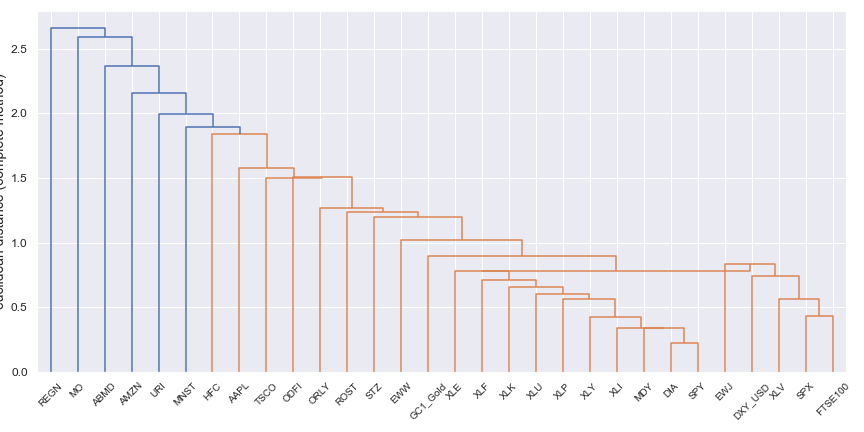

Text(77.625, 0.5, 'euclidean distance (complete method)')

In [36]:
%matplotlib notebook
plt.figure(figsize=(12,6))
dendr=dendrogram(cls, labels=df_train.columns)
plt.tight_layout()
plt.ylabel('euclidean distance (complete method)')

## 1.2 HRP Risk-ased Weight Allocation

In [13]:
#produce covariance and correlation matrix:
df_train_1=df_cols.loc['1999-01-01':'2013-12-27']
cov_mat=df_cols.cov().values 
cor_mat=df_cols.corr().values

In [14]:
def getIVP(cov):
    # Compute the inverse-variance portfolio
    ivp = 1. / np.diag(cov)
    ivp /= ivp.sum()
    return ivp

def getHRP(cov, corr):
    # Construct a hierarchical portfolio
    dist = correlDist(corr)
    link = sch.linkage(dist, 'centroid')
    #dn = sch.dendrogram(link, labels=cov.index.values, label_rotation=90)
    #plt.show()
    sortIx = getQuasiDiag(link)
    sortIx = corr.index[sortIx].tolist()
    hrp = getRecBipart(cov, sortIx)
    return hrp.sort_index()

def correlDist(corr):
    # A distance matrix based on correlation, where 0<=d[i,j]<=1
    # This is a proper distance metric
    dist = ((1 - corr) / 2.)**.5  # distance matrix
    return dist


def getQuasiDiag(link):
    # Sort clustered items by distance
    link = link.astype(int)
    sortIx = pd.Series([link[-1, 0], link[-1, 1]])
    numItems = link[-1, 3]  # number of original items
    while sortIx.max() >= numItems:
        sortIx.index = range(0, sortIx.shape[0] * 2, 2)  # make space
        df0 = sortIx[sortIx >= numItems]  # find clusters
        i = df0.index
        j = df0.values - numItems
        sortIx[i] = link[j, 0]  # item 1
        df0 = pd.Series(link[j, 1], index=i + 1)
        sortIx = sortIx.append(df0)  # item 2
        sortIx = sortIx.sort_index()  # re-sort
        sortIx.index = range(sortIx.shape[0])  # re-index
    return sortIx.tolist()

def getRecBipart(cov, sortIx):
    # Compute HRP alloc
    w = pd.Series(1, index=sortIx)
    cItems = [sortIx]  # initialize all items in one cluster
    while len(cItems) > 0:
        cItems = [i[j:k] for i in cItems for j, k in ((0, len(i) // 2), (len(i) // 2, len(i))) if len(i) > 1]  # bi-section
        for i in range(0, len(cItems), 2):  # parse in pairs
            cItems0 = cItems[i]  # cluster 1
            cItems1 = cItems[i + 1]  # cluster 2
            cVar0 = getClusterVar(cov, cItems0)
            cVar1 = getClusterVar(cov, cItems1)
            alpha = 1 - cVar0 / (cVar0 + cVar1)
            w[cItems0] *= alpha  # weight 1
            w[cItems1] *= 1 - alpha  # weight 2
    return w

def getClusterVar(cov,cItems):
    # Compute variance per cluster
    cov_=cov.loc[cItems,cItems] # matrix slice
    w_=getIVP(cov_).reshape(-1,1)
    cVar=np.dot(np.dot(w_.T,cov_),w_)[0,0]
    return cVar

In [15]:
w_hrp = getHRP(df_train_1.cov(), df_train_1.corr()).round(5)
w_hrp

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  # Remove the CWD from sys.path while we load stuff.


AAPL        0.00238
ABMD        0.06809
AMZN        0.00020
DIA         0.00692
DXY_USD     0.02510
EWJ         0.07264
EWW         0.00577
FTSE100     0.00000
GC1_Gold    0.00001
HFC         0.01378
MDY         0.00076
MNST        0.02802
MO          0.01784
ODFI        0.01416
ORLY        0.00117
REGN        0.00039
ROST        0.01020
SPX         0.00007
SPY         0.00295
STZ         0.02835
TSCO        0.00445
URI         0.00967
XLE         0.00532
XLF         0.47411
XLI         0.03589
XLK         0.05009
XLP         0.02664
XLU         0.05558
XLV         0.02664
XLY         0.01280
dtype: float64

# 2. Distance Correlation Network

## 2.1 Introduction to the principle of Distance Correlation Network
#### Building an Asset Correlation Network

Target of using this model:

**Given the $N$ assets in our portfolio, find a way of computing the allocation weights $w_{i}$, $\Big( \sum_{i=1}^{N}w_{i}=1\Big)$ such that assets more correlated with each other obtain lower weights while those less correlated with each other obtain higher weights.**

One way of tackling the above is to think of our portfolio as a weighted [graph](https://en.wikipedia.org/wiki/Graph_(discrete_mathematics)). Intuitively, a graph captures the relations between objects -- abstract or concrete. Mathematically, a weighted graph is an ordered tuple &thinsp;$G = (V, E, W)$&thinsp; where &thinsp;$V$&thinsp; is a set of *vertices* (or *nodes*), &thinsp;$E$&thinsp; is the set of pairwise relationships between the vertices (the *edges*), and $W$ is a set of numerical values assigned to each edge. 
<br/><br/>
![](https://upload.wikimedia.org/wikipedia/commons/9/9a/Weighted_network.png)
<center>A weighted graph with ten vertices and twelve edges.</center>
<br/><br/>

A useful represention of &thinsp;$G$&thinsp; is the *adjacency matrix*:

<center>$$
A_{ij} = \begin{cases} 
      1, & \text{if} \ i \ \text{is adjacent to} \ j \  \\
      0, & \text{otherwise}
   \end{cases}
$$</center>
    
Here the pairwise relations are expressed as the $ij$ entries of an $N \times N$ matrix where $N$ is the number of nodes. In what follows, the adjacency matrix becomes a critical instrument of our asset allocation algorithm. **Our strategy is to transform the historical pricing data into a graph with edges weighted by the correlations between each stock.** Once the time series data is in this form, we use graph centrality measures and graph algorithms to obtain the desired allocation weights. To construct the weighted graph we adopt the winner-take-all method presented by [Tse, *et al*. (2010)](http://cktse.eie.polyu.edu.hk/pdf-paper/JoEF-1009.pdf) with a few modifications. (See [Stock Correlation Network](https://en.wikipedia.org/wiki/Stock_correlation_network) for a summary.) Our workflow in this section is as follows.

1. We compute the *distance correlation matrix* $\rho_{D}(X_{i}, X_{j})$ for the ``Open``, ``High``, ``Low``, ``Close``, and ``Close_diff`` time series.
2. We use the NetworkX module to transform each distance correlation matrix into a weighted graph.
3. We adopt the winner-take-all method and remove edges with correlations below a threshold value of $\rho_{c} = 0.325$,

<br/><br/>
<center>$$\text{Cor}_{ij} = \begin{cases} 
      \rho_{D}(X_{i}, Y_{j}), & \rho \geq \rho_{c}  \\
      0, & \text{otherwise}.
   \end{cases}$$</center>
   
    *Note a threshold value of 0.325 is arbitrary. In practice, the threshold cannot be such that the graph is disconnected, as many centrality measures are undefined for nodes without any connections.

4. We inspect the distribution of edges (the so-called degree distribution) for each network. The degree of a node is simply the number of connections it has to other nodes. Algebraically, the degree of the *i*th vertex is given as,

<br/><br/>
<center>$$\text{Deg}(i) = \sum_{j=1}^{N}A_{ij}$$</center>

5. Finally, we build a master network by averaging over the edge weights of the ``Open``, ``High``, ``Low``, ``Close``, and ``Close_diff`` networks and derive the asset weights from its structure.

#### What is Distance Correlation and Why Should We Care?

Put simply, [Distance correlation](https://en.wikipedia.org/wiki/Distance_correlation#cite_note-SR2007-2) is a generalization of Pearson's correlation insofar as it (1) detects both linear and non-linear associations in the data and (2) can be applied to time series of unequal dimension. Below is a comparison of the Distance  and Pearson correlation.
<br/><br/>

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/400px-Correlation_examples2.svg.png)
<center>Pearson's correlation coefficients of sample data</center>

<br/><br/>
![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/Distance_Correlation_Examples.svg/400px-Distance_Correlation_Examples.svg.png)
<center>Distance correlation coefficients of sample data</center>

Distance correlation varies between 0 and 1. A Distance correlation close to 0 indicates a pair of time series is **independent** where values close to 1 indicate a high degree of **dependence**. This is in contrast to Pearson's correlation which varies between -1 and 1 and can be 0 for time series that are dependent (see [Szekely, *et al*. (2017)](https://arxiv.org/pdf/0803.4101.pdf)). What makes Distance correlation particularly  appealing is the fact that it can be applied to time series of unequal dimension. If our ultimate goal is to scale the asset allocation algorithm to the *entire* market (with time series of many assets) and update it in real-time (which it is), the algo must be able to handle time series of arbitrary dimension. The penultimate goal is to observe how an asset correlation network *representative* of the global market evolves in real-time and update the allocation weights in response.

## 2.2 Calculating the Distance Correlation Matrix with dcor

In [16]:
#imports the dcor module to calculate distance correlation
import dcor
stocks=df_train.columns.tolist()

#function to compute the distance correlation (dcor) matrix from a DataFrame and output a DataFrame 
#of dcor values.
def df_distance_correlation(df_train):
    
    #initializes an empty DataFrame
    df_train_dcor = pd.DataFrame(index=stocks, columns=stocks)
    
    #initialzes a counter at zero
    k=0
    
    #iterates over the time series of each stock
    for i in stocks:
        
        #stores the ith time series as a vector
        v_i = df_train.loc[:, i].values
        
        #iterates over the time series of each stock subect to the counter k
        for j in stocks[k:]:
            
            #stores the jth time series as a vector
            v_j = df_train.loc[:, j].values
            
            #computes the dcor coefficient between the ith and jth vectors
            dcor_val = dcor.distance_correlation(v_i, v_j)
            
            #appends the dcor value at every ij entry of the empty DataFrame
            df_train_dcor.at[i,j] = dcor_val
            
            #appends the dcor value at every ji entry of the empty DataFrame
            df_train_dcor.at[j,i] = dcor_val
        
        #increments counter by 1
        k+=1
    
    #returns a DataFrame of dcor values for every pair of stocks
    return df_train_dcor

In [17]:
df_train_dcor = df_distance_correlation(df_train)
df_train_dcor

,GC1_Gold,DXY_USD,SPX,FTSE100,EWJ,EWW,XLE,XLU,XLV,XLY,...,REGN,ROST,SPY,STZ,TSCO,URI,XLF,XLI,XLK,XLP
GC1_Gold,1,0.439561,0.0731471,0.0799056,0.101702,0.128298,0.0855235,0.0821604,0.0541786,0.0749266,...,0.0633323,0.065196,0.0758366,0.0630758,0.0755176,0.0700181,0.0868204,0.0804788,0.0668156,0.0596531
DXY_USD,0.439561,1,0.122898,0.0921921,0.173416,0.116804,0.0691627,0.0669489,0.120935,0.0595747,...,0.052003,0.0656646,0.0596516,0.0636329,0.0514422,0.0566269,0.0866013,0.0610271,0.0465804,0.075988
SPX,0.0731471,0.122898,1,0.75003,0.352756,0.39209,0.123886,0.165221,0.56636,0.157819,...,0.0976868,0.102064,0.166959,0.119232,0.0981341,0.143624,0.167927,0.184214,0.179037,0.112008
FTSE100,0.0799056,0.0921921,0.75003,1,0.29168,0.331741,0.137476,0.129661,0.512062,0.13036,...,0.0746342,0.0810112,0.124147,0.0824081,0.0850434,0.104906,0.137342,0.134237,0.13122,0.115818
EWJ,0.101702,0.173416,0.352756,0.29168,1,0.472079,0.196552,0.221967,0.14365,0.279185,...,0.179357,0.0826506,0.320399,0.121618,0.171241,0.211351,0.287727,0.278628,0.298988,0.200704
EWW,0.128298,0.116804,0.39209,0.331741,0.472079,1,0.225933,0.206262,0.244395,0.299416,...,0.158486,0.119958,0.329333,0.131884,0.168474,0.230086,0.272642,0.301005,0.328036,0.190176
XLE,0.0855235,0.0691627,0.123886,0.137476,0.196552,0.225933,1,0.48266,0.0895514,0.443886,...,0.21551,0.201974,0.568024,0.193462,0.195744,0.371819,0.429551,0.554641,0.388343,0.355612
XLU,0.0821604,0.0669489,0.165221,0.129661,0.221967,0.206262,0.48266,1,0.129786,0.436394,...,0.227021,0.2047,0.57082,0.263769,0.206895,0.304432,0.471067,0.493681,0.402142,0.486341
XLV,0.0541786,0.120935,0.56636,0.512062,0.14365,0.244395,0.0895514,0.129786,1,0.130108,...,0.0732009,0.0858776,0.130458,0.083008,0.0826773,0.083128,0.16458,0.113956,0.0873059,0.120105
XLY,0.0749266,0.0595747,0.157819,0.13036,0.279185,0.299416,0.443886,0.436394,0.130108,1,...,0.317885,0.49165,0.826272,0.317003,0.477282,0.483661,0.734237,0.784857,0.661737,0.554529


### 2.3 Building a Time-Series correlation network with NetworkX

In [18]:
#imports the NetworkX module
import networkx as nx

# takes in a pre-processed dataframe and returns a time-series correlation
# network with pairwise distance correlation values as the edges
def build_corr_nx(df_train):
    
    # converts the distance correlation dataframe to a numpy matrix with dtype float
    cor_matrix = df_train.values.astype('float')
    
    # Since dcor ranges between 0 and 1, (0 corresponding to independence and 1
    # corresponding to dependence), 1 - cor_matrix results in values closer to 0
    # indicating a higher degree of dependence where values close to 1 indicate a lower degree of 
    # dependence. This will result in a network with nodes in close proximity reflecting the similarity
    # of their respective time-series and vice versa.
    sim_matrix = 1 - cor_matrix
    
    # transforms the similarity matrix into a graph
    G = nx.from_numpy_matrix(sim_matrix)
    
    # extracts the indices (i.e., the stock names from the dataframe)
    stock_names = df_train.index.values
    
    # relabels the nodes of the network with the stock names
    G = nx.relabel_nodes(G, lambda x: stock_names[x])
    
    # assigns the edges of the network weights (i.e., the dcor values)
    G.edges(data=True)
    
    # copies G
    ## we need this to delete edges or othwerwise modify G
    H = G.copy()
    
    # iterates over the edges of H (the u-v pairs) and the weights (wt)
    for (u, v, wt) in G.edges.data('weight'):
        # selects edges with dcor values less than or equal to 0.33
        if wt >= 1 - 0.08:
            # removes the edges 
            H.remove_edge(u, v)
            
        # selects self-edges
        if u == v:
            # removes the self-edges
            H.remove_edge(u, v)
    
    # returns the final stock correlation network            
    return H
H_close = build_corr_nx(df_train_dcor)

## 2.4 Visualizing How A Portfolio is Correlated with Itself (Cluster with Physics)

The following visualizations are rendered with the [Kamada-Kawai method](http://jgaa.info/accepted/2002/HarelKoren2002.6.3.pdf), which treats each vertex of the graph as a mass and each edge as a spring. The graph is drawn by finding the list of vertex positions that minimize the total energy of the ball-spring system. The method treats the spring lengths as the weights of the graph, which is given by ``` 1 - cor_matrix ``` where ``` cor_matrix ``` is the distance correlation matrix. Nodes seperated by large distances reflect smaller correlations between their time series data, while nodes seperated by small distances reflect larger correlations. The minimum energy configuration consists of vertices with few connections experiencing a repulsive force and vertices with many connections feeling an attractive force. As such, nodes with a larger degree (more correlations) fall towards to the center of the visualization where nodes with a smaller degree (fewer correlations) are pushed outwards. For an overview of physics-based graph visualizations see the [Force-directed graph drawing](https://en.wikipedia.org/wiki/Force-directed_graph_drawing) wiki.

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# function to display the network from the distance correlation matrix
def plt_corr_nx(H, title):

    # creates a set of tuples: the edges of G and their corresponding weights
    edges, weights = zip(*nx.get_edge_attributes(H, "weight").items())

    # This draws the network with the Kamada-Kawai path-length cost-function.
    # Nodes are positioned by treating the network as a physical ball-and-spring system. The locations
    # of the nodes are such that the total energy of the system is minimized.
    pos = nx.kamada_kawai_layout(H)

    with sns.axes_style('whitegrid'):
        # figure size and style
        plt.figure(figsize=(12, 9))
        plt.title(title, size=16)

        # computes the degree (number of connections) of each node
        deg = H.degree

        # list of node names
        nodelist = []
        # list of node sizes
        node_sizes = []

        # iterates over deg and appends the node names and degrees
        for n, d in deg:
            nodelist.append(n)
            node_sizes.append(d)

        # draw nodes
        nx.draw_networkx_nodes(
            H,
            pos,
            node_color="#DA70D6",
            nodelist=nodelist,
            node_size=np.power(node_sizes, 2.33),
            alpha=0.8,
            font_weight="bold",
        )

        # node label styles
        nx.draw_networkx_labels(H, pos, font_size=13, font_family="sans-serif", font_weight='bold')

        # color map
        cmap = sns.cubehelix_palette(3, as_cmap=True, reverse=True)

        # draw edges
        nx.draw_networkx_edges(
            H,
            pos,
            edge_list=edges,
            style="solid",
            edge_color=weights,
            edge_cmap=cmap,
            edge_vmin=min(weights),
            edge_vmax=max(weights),
        )

        # builds a colorbar
        sm = plt.cm.ScalarMappable(
            cmap=cmap, 
            norm=plt.Normalize(vmin=min(weights), 
            vmax=max(weights))
        )
        sm._A = []
        plt.colorbar(sm)

        # displays network without axes
        plt.axis("off")

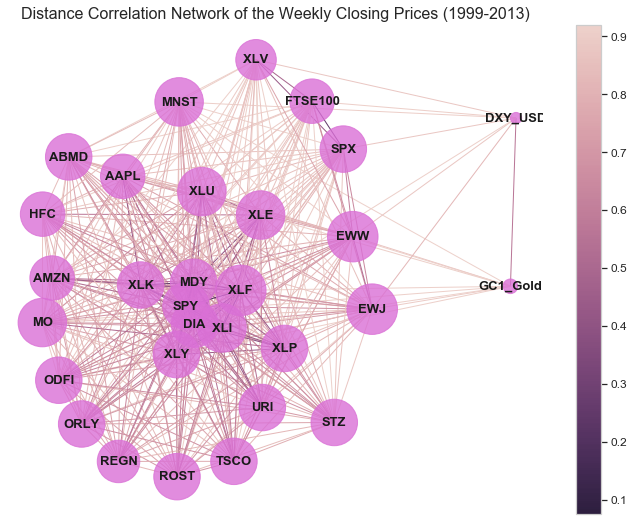

In [20]:
# plots the distance correlation network of the weekly closing prices from 1999-2013 (training period)
plt_corr_nx(H_close, title='Distance Correlation Network of the Weekly Closing Prices (1999-2013)')

In the above visualization, the sizes of the vertices are proportional to the number of connections they have. The colorbar to the right indicates the degree of disimilarity (the distance) between the stocks. The larger the value (the lighter the color) the less similar the stocks are. In particular, several ETFs jump out. **SHCOMP**, **NKY_Nikkei225** and **cl1_oil** has no correlation above 0.325, **DXY_USD** and **GC1_Gold** all lie on the periphery of the network with the fewest number of correlations above $\rho_{c} = 0.325$. On the other hand **SPX**, **FTSE100**, **XLY**, and **XLE** sit in the core of the network with the greatest number connections above $\rho_{c} = 0.325$. It is clear from the closing prices network that our asset allocation algorithm needs to reward vertices on the periphery and punish those nearing the center. In the next code block we build a function to visualize how the edges of the distance correlation network are distributed.

### Degree Histogram

In [21]:
# function to visualize the degree distribution
def hist_plot(network, title, bins, xticks):
    
    # extracts the degrees of each vertex and stores them as a list
    deg_list = list(dict(network.degree).values())
    
    # sets local style
    with plt.style.context('fivethirtyeight'):
        # initializes a figure
        plt.figure(figsize=(9,6))

        # plots a pretty degree histogram with a kernel density estimator
        sns.distplot(
            deg_list,  
            kde=True,
            bins = bins,
            color='salmon',
            hist_kws={'alpha': 0.7}

        );

        # turns the grid off
        plt.grid(False)

        # controls the number and spacing of xticks and yticks
        plt.xticks(xticks, size=11)
        plt.yticks(size=11)

        # removes the figure spines
        sns.despine(left=True, right=True, bottom=True, top=True)

        # labels the y and x axis
        plt.ylabel("Probability", size=15)
        plt.xlabel("Number of Connections", size=15)

        # sets the title
        plt.title(title, size=20);

        # draws a vertical line where the mean is
        plt.axvline(sum(deg_list)/len(deg_list), 
                    color='darkorchid', 
                    linewidth=3, 
                    linestyle='--', 
                    label='Mean = {:2.0f}'.format(sum(deg_list)/len(deg_list))
        )

        # turns the legend on
        plt.legend(loc=0, fontsize=12)

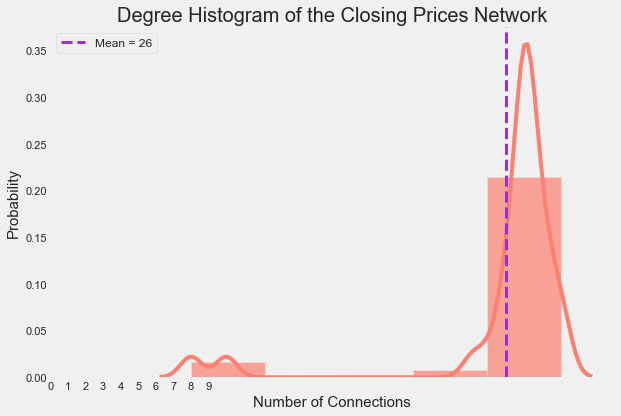

In [22]:
# plots the degree histogram of the closing prices network
hist_plot(
    H_close, 
    'Degree Histogram of the Closing Prices Network', 
    bins=5, 
    xticks=range(0, 10)
)

**Observations**  **PENDING**

* The degree distribution is left-skewed.
* The average node is connected to 86.6% of the network.
* Very few nodes are connected to less than 66.6% of the network. 
* The kernel density estimation is not a good fit.
* By eyeballing the plot, the degrees appear to follow an *inverse power-law* distribution. (This would be consistent with the findings of [Tse, *et al*. (2010)](http://cktse.eie.polyu.edu.hk/pdf-paper/JoEF-1009.pdf)).

## 2.5 Distance Correlation Network Weight Correlation 

### Communicability as a Measure of Relative Risk

We are now in a position to devise a method to compute the allocation weights of our portfolio. To recall, this is the problem:

**Given the $N$ assets in our portfolio, find a way of computing the allocation weights $w_{i}$, &thinsp; $\Big( \sum_{i=1}^{N}w_{i}=1\Big)$ such that assets more correlated with each other obtain lower weights while those less correlated with each other obtain higher weights.**

Theres an infinite number of possible solutions to the above problem. The asset correlation network we built contains information on how our portfolio is interrelated (whose connected to who), but it does not tell us how each asset *impacts* the other or how those impacts travel throughout the network. If, for example, Apple's stock lost 40% of its value wiping out, say, two years of gains, how would this impact the remaining assets in our portfolio? How easily does this kind of behaviour spread and how can we keep our capital isolated from it? We thus seek a measure of "relative risk" that quantifies not only the correlations between assets, but how those correlations mediate perturbations in the portfolio. Our aim, therefore, is twofold: allocate capital inversely proportional to (1) the correlations between assets and (2) proportional to the "impact resistence" of each asset. As luck would have it, there is a [centrality](https://en.wikipedia.org/wiki/Centrality) measure that does just this! Let us define the relative risk as follows:

<br/><br/>
<center>$\text{Relative Risk of Asset} \ r$ = $\dfrac{\omega_{r}}{\sum_{r'=1}^{N}\omega_{r'}}$,</center>
<br/><br/>
where 
<center>$\omega_{r} = \dfrac{1}{C}\sum_{p}\sum_{q}\dfrac{G_{prq}}{G_{pq}}$</center>

is the **Communicability Betweenness centrality** [(Estrada, *et al.* (2009))](https://arxiv.org/pdf/0905.4102.pdf) of node $r$. Here
<br/><br/>
<center>$G_{prq} = \big(\exp{\textbf{A}}\big)_{pq} - \big(\exp{(\textbf{A} - \textbf{E}(r))}\big)_{pq}$</center>

is the number of weighted [walks](http://mathworld.wolfram.com/Walk.html) involving only node $r$,
<br/><br/>
<center>$G_{pq} = \big(\exp{\textbf{A}}\big)_{pq}$</center>

is the so-called *communicability* between nodes $p$ and $q$,
<br/><br/>
<center>$A_{pq} = \begin{cases} 
      1, & \text{if} \ \rho \geq \rho_{c}  \\
      0, & \text{otherwise}
   \end{cases}$</center>
   
is the adjacency matrix induced by the distance correlation matrix $\text{Cor}_{ij}$, and $\textbf{E}(r)$ is a matrix such that when added to $\textbf{A}$, yields a new graph $G(r) = (V, E')$ with all edges connecting $r \in V$ removed. The constant $C = (n-1)^2 - (n-1)$ normalizes $\omega_{r}$ such that it takes values between 0 and 1. We can better understand what $\omega_{r}$ is counting by re-writing the matrix exponential as a taylor series:
<br/><br/>

<center>$\exp{\textbf{A} = \sum_{k=1}^{\infty}}\dfrac{\textbf{A}^{k}}{k!}$</center>

Rasing the adjacency matrix to the power of $k$ counts all walks from $p$ to $q$ of length $k$. The matrix exponential therefore counts all possible ways of moving from $p$ to $q$ weighted by the inverse factorial of $k$. So the denominator of $\omega_{r}$ counts all weighted walks involving every node. Put simply,
<br/><br/>

<center>$\boxed{\text{Communicability Betweenees centrality} = \dfrac{\text{sum of all weighted walks involving node r}}{\text{sum of all weighted walks involving every node}}}$</center>

So the communicability betweenness centrality is proportional to the number of connections (correlations) a node has and therefore satisifies the first requirement of relative risk. Next, we explore how this measure quantifies the spread of impacts throughout the network, satisfying our second requirement.

## The Physics of what Communicability Measures

[Estrada & Hatano (2007)](https://arxiv.org/pdf/0707.0756.pdf) provided an ingenius argument showing the communicability of a network is identical to the Green's function of a network. That is, it measures how impacts (or more generally thermal fluctuations) travel from one node to another. Their argument works by treating each node as an oscillator and each edge as a spring (which is what we did to generate the visualization of our asset correlation network). Intuitively, we can draw an analogy between the movement of an asset's price and its motion in a ball-spring system. In this analogy, volatility is equivalent to how energetic the oscillator is. Revisiting the hypothetical scenerio of Apple losing 40% of its value: we can visualize this in our mind's eye as an impact to one of the masses---causing it to violently oscillate. How does this motion propagate throughout the rest of the ball-spring system? Which masses absorb the blow and which reflect it? Communicability betweeness centrality answers this question by counting all possible ways the impact can reach node $r$. Higher values indicate the node has a greater susceptiblility to impacts whereas lower values denote just the opposite.

# The Bottom Line

The communicability of a network quantifies how impacts spread from one node to another. In the context of an asset correlation network, communicability measures how volatility travels node to node. **We aim to position our capital such that it's the most resistant to the communicability of volatility**. Recall we seek a portfolio that (1) consistently generates wealth while minimizing potential losess and (2) is robust against large market fluctuations and economic downturns. Of course, generous returns are desired, but not in a way that threatens our initial investment. To this end, the strategy moving forward is this: allocate capital inversely proportional to its relative (or intraportfolio) risk.


## Intraportfolio Risk

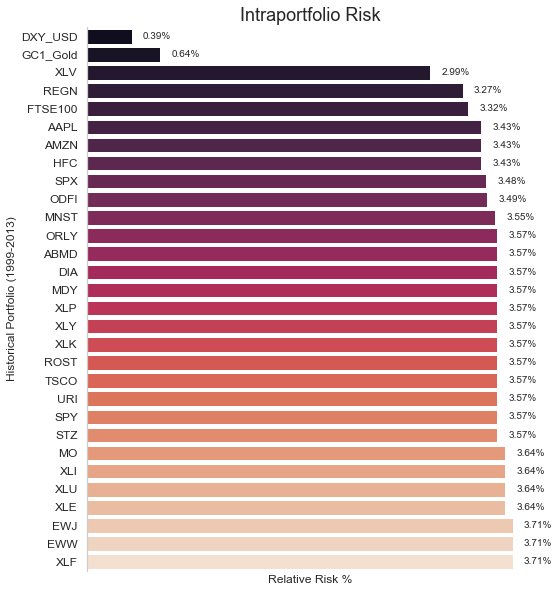

In [23]:
# calculates the communicability betweeness centrality and returns a dictionary
risk_alloc = nx.communicability_betweenness_centrality(H_close)

# converts the dictionary of degree centralities to a pandas series
risk_alloc = pd.Series(risk_alloc)

# normalizes the degree centrality 
risk_alloc = risk_alloc / risk_alloc.sum()

# resets the index
risk_alloc.reset_index()

# converts series to a sorted DataFrame
risk_alloc = (
    pd.DataFrame({"Stocks": risk_alloc.index, "Risk Allocation": risk_alloc.values})
        .sort_values(by="Risk Allocation", ascending=True)
        .reset_index()
        .drop("index", axis=1)
)

with sns.axes_style('whitegrid'):
    # initializes figure
    plt.figure(figsize=(8,10))

    # plots a pretty seaborn barplot
    sns.barplot(x='Risk Allocation', y='Stocks', data=risk_alloc, palette="rocket")

    # removes spines
    sns.despine(right=True, top=True, bottom=True)

    # turns xticks off
    plt.xticks([])

    # labels the x axis
    plt.xlabel("Relative Risk %", size=12)

    # labels the y axis
    plt.ylabel("Historical Portfolio (1999-2013)", size=12)

    # figure title
    plt.title("Intraportfolio Risk", size=18)

    # iterates over the stocks (label) and their numerical index (i)
    for i, label in enumerate(list(risk_alloc.index)):

        # gets the height of each bar in the barplot
        height = risk_alloc.loc[label, 'Risk Allocation']

        # gets the relative risk as a percentage (the labels)
        label = (risk_alloc.loc[label, 'Risk Allocation']*100 
                    ).round(2).astype(str) + '%'

        # annotates the barplot with the relative risk percentages
        plt.annotate(str(label), (height + 0.001, i + 0.15))

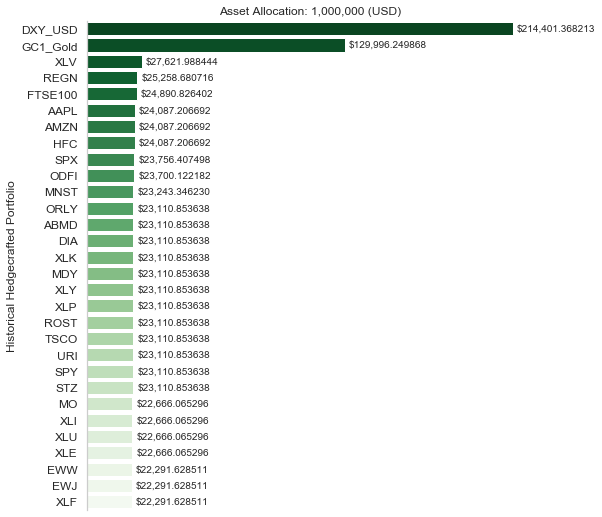

In [24]:
# calculates degree centrality and assigns it to investmnet_A
investment_A = nx.communicability_betweenness_centrality(H_close)

# calculates the inverse of the above and re-asigns it to investment_A as a pandas series
investment_A = 1 / pd.Series(investment_A)

# normalizes the above
investment_A = investment_A / investment_A.sum()

# resets the index
investment_A.reset_index()

# converts the above series to a sorted DataFrame
investment_A = (
    pd.DataFrame({"Stocks": investment_A.index, "Asset Allocation": investment_A.values})
        .sort_values(by="Asset Allocation", ascending=False)
        .reset_index()
        .drop("index", axis=1)
)

with sns.axes_style('whitegrid'):
    # initializes a figure
    plt.figure(figsize=(8,9))

    # plot a pretty seaborn barplot
    sns.barplot(x='Asset Allocation', y='Stocks', data=investment_A, palette="Greens_r")

    # despines the figure
    sns.despine(right=True, top=True, bottom=True)

    # turns xticks off
    plt.xticks([])

    # turns the x axis label off
    plt.xlabel('')

    # fig title
    plt.title("Asset Allocation: 1,000,000 (USD)", size=12)

    # y axis label
    plt.ylabel("Historical Hedgecrafted Portfolio", size=12)

    # captial to be allocated
    capital = 10**6

    # iterates over the stocks (label) and their numerical indices (i)
    for i, label in enumerate(list(investment_A.index)):

        # gets the height of each bar
        height = investment_A.loc[label, 'Asset Allocation']

        # calculates the capital to be allocated
        label = (investment_A.loc[label, 'Asset Allocation'] * capital
                    ).round(6)


        # annotes the capital above each bar
        plt.annotate('${:,.6f}'.format(label), (height + 0.002, i + 0.15))

In [25]:
risk_alloc

,Stocks,Risk Allocation
0,DXY_USD,0.003853
1,GC1_Gold,0.006355
2,XLV,0.029908
3,REGN,0.032706
4,FTSE100,0.033190
5,AAPL,0.034297
6,AMZN,0.034297
7,HFC,0.034297
8,SPX,0.034775
9,ODFI,0.034857


In [26]:
# calculates communicability betweeness centrality
weights = nx.communicability_betweenness_centrality(H_close)

# a function to convert centrality scores to portfolio weights
def centrality_to_portfolio_weights(weights):
    
    """Returns a dictionary of portfolio weights.
    
    Parameters
    ----------
    weights: dictionary
        NetworkX centrality scores
        
    Returns
    -------
    portfolio weights: dictionary
        normalized inverse of chosen centrality measure
        
    """

    # iterates over the key, value pairs in the weights dict
    for key, value in weights.items():

        # takes the inverse of the communicability betweeness centrality of each asset
        weights[key] = 1/value

    # normalization parameter for all weights to add to 1
    norm = 1.0 / sum(weights.values())

    # iterates over the keys (stocks) in the weights dict
    for key in weights:

        # updates each key value to the normalized value and rounds to 5 decimal places
        weights[key] = round(weights[key] * norm, 5)
        
    return weights
    

w_corrnet=pd.Series(centrality_to_portfolio_weights(weights))

In [27]:
w_corrnet

GC1_Gold    0.13000
DXY_USD     0.21440
SPX         0.02376
FTSE100     0.02489
EWJ         0.02229
EWW         0.02229
XLE         0.02267
XLU         0.02267
XLV         0.02762
XLY         0.02311
AAPL        0.02409
ABMD        0.02311
AMZN        0.02409
DIA         0.02311
HFC         0.02409
MDY         0.02311
MNST        0.02324
MO          0.02267
ODFI        0.02370
ORLY        0.02311
REGN        0.02526
ROST        0.02311
SPY         0.02311
STZ         0.02311
TSCO        0.02311
URI         0.02311
XLF         0.02229
XLI         0.02267
XLK         0.02311
XLP         0.02311
dtype: float64

In [28]:
weights

{'GC1_Gold': 0.13,
 'DXY_USD': 0.2144,
 'SPX': 0.02376,
 'FTSE100': 0.02489,
 'EWJ': 0.02229,
 'EWW': 0.02229,
 'XLE': 0.02267,
 'XLU': 0.02267,
 'XLV': 0.02762,
 'XLY': 0.02311,
 'AAPL': 0.02409,
 'ABMD': 0.02311,
 'AMZN': 0.02409,
 'DIA': 0.02311,
 'HFC': 0.02409,
 'MDY': 0.02311,
 'MNST': 0.02324,
 'MO': 0.02267,
 'ODFI': 0.0237,
 'ORLY': 0.02311,
 'REGN': 0.02526,
 'ROST': 0.02311,
 'SPY': 0.02311,
 'STZ': 0.02311,
 'TSCO': 0.02311,
 'URI': 0.02311,
 'XLF': 0.02229,
 'XLI': 0.02267,
 'XLK': 0.02311,
 'XLP': 0.02311}

# 3. Benchmark Portfolio Construction: 

## 3.1 Black-Litterman Method 

In [29]:
def getIVP(cov):
    # Compute the inverse-variance portfolio
    ivp = 1. / np.diag(cov)
    ivp /= ivp.sum()
    return ivp

In [30]:
w_ivp = getIVP(cov_mat)
w_ivp

array([5.09711988e-05, 9.04367154e-02, 3.17710871e-05, 1.20125773e-05,
       1.39709232e-01, 3.94181320e-02, 3.58701837e-02, 5.96814630e-02,
       2.01762175e-02, 1.23145706e-02, 2.16374640e-03, 1.44416712e-03,
       3.40866078e-05, 3.07025711e-03, 4.00637950e-02, 1.35786303e-03,
       2.46638466e-02, 3.55831398e-02, 9.36627059e-03, 8.20470121e-04,
       3.74339319e-04, 1.26855300e-02, 2.52518357e-03, 2.58546712e-03,
       1.06503203e-02, 5.58879789e-03, 3.32192986e-01, 3.34785163e-02,
       2.94184694e-02, 5.42314787e-02])

## 3.2 Efficient Frontier Portfolio Construction Method

### Markovits mean-variance allocation method (The Efficient Frontier) introduction 

Harry Markowitz's 1952 paper [Portfolio Selection](https://www.math.ust.hk/~maykwok/courses/ma362/07F/markowitz_JF.pdf) transformed portfolio management from an art to a science. Markowitz's key insight came from diversification: by combinining uncorrelated assets with different expected returns and volatilities, one can calculate an optimal allocation.

The main idea is this: if $w$ is the fraction of capital to be allocated to some asset, then the portfolio risk in terms of the covariance matrix $\Sigma$ is given by $w^{\top}\Sigma w$ and its expected returns are given by $w^{\top}\mu$. The optimal portfolio can therefore be regarded as a convex optimization problem, and a solution can be found with quadratic programming. Denoting the target returns as $\mu*$ the optimization problem is mathmeatically expressed as follows:
<br/><br/>
<center>\begin{split}\begin{equation*}
\begin{aligned}
& \underset{w}{\text{minimise}} & & w^T \Sigma w \\
& \text{subject to} & & w^T\mu \geq \mu^*\\
&&& w^T\mathbf{1} = 1 \\
&&& w_i \geq 0 \\
\end{aligned}
\end{equation*}\end{split}</center>

Varying the target return yields a different set of weights (i.e., a different portfolio). The set of all the portfolios with optimal weights is referred to as the **efficient frontier**.

![](https://pyportfolioopt.readthedocs.io/en/latest/_images/efficient_frontier.png)

Each dot in the above plot represents a different possible portoflio, with darker blue corresponding to better portfolios (in terms of the Sharpe ratio). The dotted black line is the frontier. The triangular markers denote the optimal portfolios subjected to different optimization objectives.

In the code blocks bellow we use the PyPortfolioOpt library to implement the Efficient Frontier algorithm. Rather than optimizing for a maximum Sharpe ratio, we optimize for a minimum volatility as these portfolios tend to outperform portfolio's with a maximized Sharpe ratio.

In [31]:
import pandas as pd
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [32]:
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(df_cols)
S = risk_models.sample_cov(df_cols)

# Optimise for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
raw_weights = ef.efficient_return(0.1)
w_mark = ef.clean_weights()
w_mark=pd.Series(w_mark)
print(w_mark)
ef.portfolio_performance(verbose=True)

GC1_Gold    0.17841
DXY_USD     0.55548
SPX         0.02300
FTSE100     0.00463
EWJ         0.03378
EWW         0.00000
XLE         0.00000
XLU         0.00000
XLV         0.08420
XLY         0.00000
AAPL        0.00000
ABMD        0.00072
AMZN        0.00000
DIA         0.00812
HFC         0.00000
MDY         0.00000
MNST        0.00000
MO          0.00000
ODFI        0.00000
ORLY        0.00000
REGN        0.00114
ROST        0.00000
SPY         0.00000
STZ         0.00000
TSCO        0.00000
URI         0.00000
XLF         0.00000
XLI         0.00000
XLK         0.00000
XLP         0.11046
dtype: float64
Expected annual return: 19.5%
Annual volatility: 10.0%
Sharpe Ratio: 1.74


(0.19478595259034798, 0.10019531283696963, 1.7444523864579047)

In [33]:
df_results = pd.DataFrame(index = df_cols.columns, data=np.vstack((w_ivp, w_hrp,w_mark,w_corrnet)).transpose(), columns=['Black-Litterman', 'HRP','Efficient Frontier','Correlation Network'])
df_results

,Black-Litterman,HRP,Efficient Frontier,Correlation Network
GC1_Gold,0.000051,0.00238,0.17841,0.13000
DXY_USD,0.090437,0.06809,0.55548,0.21440
SPX,0.000032,0.00020,0.02300,0.02376
FTSE100,0.000012,0.00692,0.00463,0.02489
EWJ,0.139709,0.02510,0.03378,0.02229
EWW,0.039418,0.07264,0.00000,0.02229
XLE,0.035870,0.00577,0.00000,0.02267
XLU,0.059681,0.00000,0.00000,0.02267
XLV,0.020176,0.00001,0.08420,0.02762
XLY,0.012315,0.01378,0.00000,0.02311


<IPython.core.display.Javascript object>


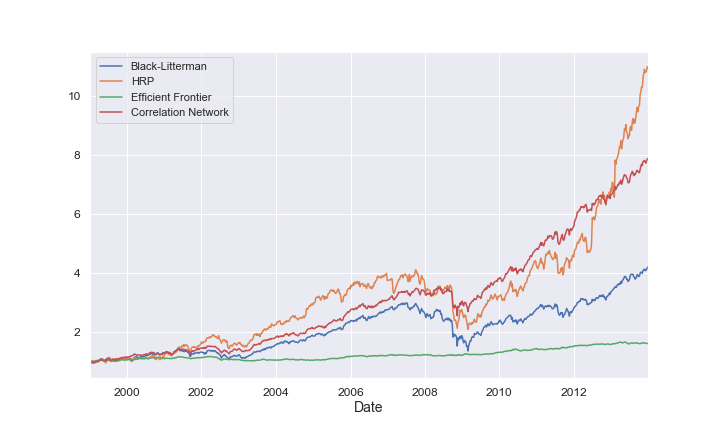

In [37]:
frame1=df_results.iloc[:,0]
frame2=df_results.iloc[:,1]
frame3=df_results.iloc[:,2]
frame4=df_results.iloc[:,3]
returns=df_train[list(frame1.index)]
returns_1 = returns.multiply(frame1).sum(axis=1)
returns_2=returns.multiply(frame2).sum(axis=1)
returns_3=returns.multiply(frame3).sum(axis=1)
returns_4=returns.multiply(frame4).sum(axis=1)
returns_1.name='Black-Litterman'
returns_2.name='HRP'
returns_3.name='Efficient Frontier'
returns_4.name='Correlation Network'
returns_full = pd.concat((returns_1,returns_2, returns_3,returns_4),axis=1)
((returns_full+1).cumprod()).plot(figsize=(10,6))

In [38]:
# generally calculate Sharpe ratio. 
General_sharpe=(returns_full.mean() / returns_full.std())
General_sharpe=pd.DataFrame(General_sharpe, columns=['General Sharpe Ratio'])
print(General_sharpe)

                     General Sharpe Ratio
Black-Litterman                  0.089346
HRP                              0.120976
Efficient Frontier               0.098768
Correlation Network              0.172288


## Portfolio Performance & Backtest: Use multiple matrices to assess our data

In this section we write production (almost) ready code for portfolio analysis and include our own HRP returns score. The section looks something like this:

* We obtain the cumulative returns and returns on investment,
* extract the end of year returns and annual return rates,
* calculate the average annual rate of returns and annualized portfolio standard deviation,
* compute the Sharpe Ratio, 
* Maximum Drawdown, 
* Returns over Maximum Drawdown, 
* and our own unique measure: the Growth-Risk Ratio.

Finally, we visualize the returns, drawdowns, and returns distribution of each model and analyze the results.

suppose we have 1 million capital to contruct the portfolio, to backtest 2014-01-01 to 2020-07-10, we assume we buy in stocks with the price at the end of 2013, the exact date is ```2013-12-27```

In [39]:
# DataFrame of the prices we buy stock at
df_buy_in = df_cols.loc['2013-12-27'].sort_index().to_frame('Buy In: 2013-12-27')
df_buy_in

,Buy In: 2013-12-27
AAPL,70.747330
ABMD,26.850000
AMZN,397.970001
DIA,141.636993
DXY_USD,80.392000
EWJ,43.858120
EWW,59.767712
FTSE100,6750.870000
GC1_Gold,1216.100000
HFC,38.511478


In [40]:
# imports a tool to convert capital into shares
from pypfopt import discrete_allocation

# returns the number of shares to buy given the Black-Litterman asset weights, prices, and capital to invest
bl_alloc = discrete_allocation.DiscreteAllocation(
    df_results.iloc[:,0].to_dict(), 
    df_buy_in['Buy In: 2013-12-27'], 
    total_portfolio_value=capital
)
bl_alloc = bl_alloc.greedy_portfolio()[0]

# returns the number of shares to buy given the HRP asset weights, prices, and capital to invest
hrp_alloc = discrete_allocation.DiscreteAllocation(
    df_results.iloc[:,1].to_dict(), 
    df_buy_in['Buy In: 2013-12-27'], 
    total_portfolio_value=capital
)
hrp_alloc = hrp_alloc.greedy_portfolio()[0]

# returns the number of shares to buy given the efficient frontier asset weights, prices, and capital to invest
ef_alloc = discrete_allocation.DiscreteAllocation(
    df_results.iloc[:,2].to_dict(), 
    df_buy_in['Buy In: 2013-12-27'], 
    total_portfolio_value=capital
)
ef_alloc = ef_alloc.greedy_portfolio()[0]

# returns the number of shares to buy given the correlation network asset weights, prices, and capital to invest
cn_alloc = discrete_allocation.DiscreteAllocation(
    df_results.iloc[:,3].to_dict(), 
    df_buy_in['Buy In: 2013-12-27'], 
    total_portfolio_value=capital
)
cn_alloc = cn_alloc.greedy_portfolio()[0]

In [42]:
# converts above shares to a pandas series
bl_alloc_series = pd.Series(bl_alloc, name='Shares')
hrp_alloc_series = pd.Series(hrp_alloc, name='Shares')
ef_alloc_series = pd.Series(ef_alloc, name='Shares')
cn_alloc_series = pd.Series(cn_alloc, name='Shares')

# names the series
bl_alloc_series.index.name = 'Assets'
hrp_alloc_series.index.name = 'Assets'
ef_alloc_series.index.name = 'Assets'
cn_alloc_series.index.name = 'Assets'

# resets index, prints assets with the shares we buy
bl_alloc_series.reset_index
hrp_alloc_series.reset_index
ef_alloc_series.reset_index
cn_alloc_series.reset_index


<bound method Series.reset_index of Assets
DXY_USD     2666
GC1_Gold     106
XLV          556
REGN          91
FTSE100        4
AAPL         340
AMZN          60
HFC          625
SPX           13
ODFI         691
MNST        1044
XLY          380
ABMD         860
DIA          163
MDY          104
ORLY         179
ROST         662
SPY          143
STZ          356
TSCO         326
URI          302
XLK          725
XLP          647
XLE          329
XLU          756
MO           828
XLI          502
EWJ          508
EWW          372
XLF         1861
Name: Shares, dtype: int64>

In [43]:
# converts Black-Litterman shares series to a DataFrame
df_bl_alloc = bl_alloc_series.sort_index().to_frame('Shares')
df_hrp_alloc=hrp_alloc_series.sort_index().to_frame('Shares')
df_ef_alloc=ef_alloc_series.sort_index().to_frame('Shares')
df_cn_alloc=cn_alloc_series.sort_index().to_frame('Shares')

In [44]:
bl_capital = (df_buy_in['Buy In: 2013-12-27']*df_bl_alloc['Shares']).sum()
hrp_capital = (df_buy_in['Buy In: 2013-12-27']*df_hrp_alloc['Shares']).sum()
ef_capital = (df_buy_in['Buy In: 2013-12-27']*df_ef_alloc['Shares']).sum()
cn_capital = (df_buy_in['Buy In: 2013-12-27']*df_cn_alloc['Shares']).sum()


### (1) Cumulative returns

In [45]:
# function to compute the cumulative returns of a portfolio
def cumulative_returns(shares_allocation, capital, test_data):
    
    """Returns the cumulative returns of a portfolio.
    
    Parameters
    ----------
    shares_allocation: DataFrame
        number of shares allocated to each asset in the portfolio
        
    capital: float
        total amount of money invested in the portfolio
        
    test_data: DataFrame
        daily closing prices of portfolio assets
        
    Returns
    -------
    cumulative_daily_returns: Series
        cumulative daily returns of the portfolio
        
    """
    
    # list of DataFrames of cumulative returns for each stock
    daily_returns = []

    # iterates over every stock in the portfolio
    for stock in shares_allocation.index:

        # multiples shares by share prices in the validation dataset
        daily_returns.append(shares_allocation.loc[stock].values * test_data[stock])

    # concatenates every DataFrame in the above list to a single DataFrame
    daily_returns_df = pd.concat(daily_returns, axis=1).reset_index()

    # sets the index as the date
    daily_returns_df.set_index("Date", inplace=True)

    # adds the cumulative returns for every stock
    cumulative_daily_returns = daily_returns_df.sum(axis=1)
    # returns the cumulative daily returns of the portfolio
    return cumulative_daily_returns

In [46]:
# Black-Litterman cumulative weekly returns
bl_total_weekly_returns = cumulative_returns(
    df_bl_alloc, 
    bl_capital, 
    df_test
).rename('Black-Litterman Cumulative Weekly Returns')

# HRP cumulative daily returns
hrp_total_weekly_returns = cumulative_returns(
    df_hrp_alloc, 
    hrp_capital, 
    df_test
).rename('HRP Cumulative Weekly Returns')


# Efficient Frontier cumulative daily returns
ef_total_weekly_returns = cumulative_returns(
    df_ef_alloc, 
    ef_capital, 
    df_test
).rename('EF Cumulative Weekly Returns')


# Correlation Network cumulative daily returns
cn_total_weekly_returns = cumulative_returns(
    df_cn_alloc, 
    cn_capital, 
    df_test
).rename('Correlation Network Cumulative Weekly Returns')


# function to compute daily/weekly return on investment (roi)
def portfolio_daily_roi(shares_allocation, capital, test_data):
    
    """Returns the daily return on investment.
    
    Parameters
    ----------
    shares_allocation: DataFrame
        number of shares allocated to each asset
        
    capital: float
        total amount of money invested in the portfolio
        
    test_data: DataFrame
        daily closing prices of each asset
        
    Returns
    -------
    daily_roi: Series
        daily return on investment of the portfolio
        
    """
    
    # computes the cumulative returns
    cumulative_daily_returns = cumulative_returns(
        shares_allocation, 
        capital, 
        test_data
    )

    # calculates daily return on investment
    daily_roi = cumulative_daily_returns.apply(
        lambda returns: ((returns - capital) / capital)*100
    )
    
    # returns the daily return on investment
    return daily_roi

# In our project, we just calculate weekly return 
# Black-Litterman weekly return on investment

bl_weekly_roi = portfolio_daily_roi(
    df_bl_alloc, 
    bl_capital, 
    df_test
).rename('Black-Litterman Weekly Returns')


# HRP weekly return on investment
hrp_weekly_roi = portfolio_daily_roi(
    df_hrp_alloc, 
    hrp_capital, 
    df_test
).rename('HRP Weekly Returns')


# Efficient Frontier weekly return on investment
ef_weekly_roi = portfolio_daily_roi(
    df_ef_alloc, 
    ef_capital, 
    df_test
).rename('EF Weekly Returns')


# Correlation Network weekly return on investment
cn_weekly_roi = portfolio_daily_roi(
    df_cn_alloc, 
    cn_capital, 
    df_test
).rename('Correlation Network Weekly Returns')


### (2) End of Year Returns

In [47]:
# imports datetime manipluation library
from datetime import datetime

# function to extract the end of year returns
def end_of_year_returns(model_roi, return_type, start, end):
    
    """Returns the end of year returns of a portfolio.
    
    Parameters
    ----------
    model_roi: Series
        portoflio returns on investment
        
    return_type: string
        'returns': returns roi
        'returns_rate': returns rate of returns
        
    start: int
        starting year to extract last trading day from
        
    end: int
        ending year to extract last trading day from
        
    Returns
    -------
    end_of_year_returns: dictionary
        each year's returns or rate of returns
        
    """
    
    # converts index of datetimes to a list of strings
    dates = model_roi.index.astype('str').tolist()
    
    # list comprehension of a string of dates between the 
    # start and end dates
    years = [str(x) for x in range(start, end + 1)]
    
    # generates an empty list of lists for each year
    end_year_dates = [[] for _ in range(len(years))]
    
    # iterates over every date in the roi series
    for date in dates:
        
        # iterates over every year in the years list
        for year in years:
            
            # iterates over every year in each date
            if year in date:
                
                # converts each date string to a datime object
                datetime_object = datetime.strptime(date, '%Y-%m-%d')
                
                # appends each date to its corresponding year in the years list
                (end_year_dates[years.index(year)]
                    .append(datetime.strftime(datetime_object, '%Y-%m-%d')))
    
    # finds the last date in each year
    end_year_dates = [max(x) for x in end_year_dates]
    
    # gets the rounded end of year returns
    returns = [round(model_roi[date], 1) for date in end_year_dates]
    
    # shifts the returns list by 1 and appends 0 to the beginning of the list
    return_rates = [0] + returns[:len(returns)-1]
    """Example: [a, b, c] -> [0, a, b]"""
    
    # converts returns list to an array
    returns_arr = np.array(returns)
    
    # converts the return_rates list to an array
    return_rates_arr = np.array(return_rates)
    
    # calculates the rounded rate of returns 
    return_rates = [round(x, 1) for x in list(returns_arr - return_rates_arr)]
    """Example: [a, b, c] - [0, a, b] = [a, b-a, c-b]"""
    
    # dictionary with the years as keys and returns as values
    returns = dict(zip(years, returns))
    
    # dictionary with the years as keys and return rates as values
    return_rates = dict(zip(years, return_rates))
    
    if return_type == 'returns':
        return returns
    
    if return_type == 'return_rates':
        return return_rates
        

# Black-Litterman annual return rates     
bl_returns_dict = end_of_year_returns(
    bl_weekly_roi, 
    'return_rates', 
    2014, 
    2020
)

# HRP annual return rates
hrp_returns_dict = end_of_year_returns(
    hrp_weekly_roi, 
    'return_rates', 
    2014, 
    2020
)

# Efficient Frontier annual return rates
ef_returns_dict = end_of_year_returns(
    ef_weekly_roi, 
    'return_rates', 
    2014, 
    2020
)

# Correlation Network annual return rates
cn_returns_dict = end_of_year_returns(
    cn_weekly_roi, 
    'return_rates', 
    2014, 
    2020
)

# Black-Litterman annual returns
bl_tot_returns_dict = end_of_year_returns(
    bl_weekly_roi, 
    'returns', 
    2014, 
    2020
)

# Efficient Frontier annual returns
ef_tot_returns_dict = end_of_year_returns(
    ef_weekly_roi, 
    'returns', 
    2014, 
    2020
)

# HRP annual returns
hrp_tot_returns_dict = end_of_year_returns(
    hrp_weekly_roi, 
    'returns', 
    2014, 
    2020
)

# Correlation network annual returns
cn_tot_returns_dict = end_of_year_returns(
    cn_weekly_roi, 
    'returns', 
    2014, 
    2020
)

In [48]:
print(bl_returns_dict, '\n'*2, hrp_returns_dict, '\n'*2, ef_returns_dict, '\n'*2, cn_returns_dict)

{'2014': 12.6, '2015': 4.1, '2016': 28.9, '2017': 29.3, '2018': -20.9, '2019': 42.7, '2020': -23.7} 

 {'2014': 27.0, '2015': 38.8, '2016': 14.0, '2017': 79.1, '2018': -39.5, '2019': 29.2, '2020': 7.5} 

 {'2014': 10.8, '2015': 5.8, '2016': 5.0, '2017': 1.5, '2018': 0.9, '2019': 12.9, '2020': 3.9} 

 {'2014': 15.3, '2015': 12.3, '2016': 12.9, '2017': 30.3, '2018': -0.3, '2019': 26.2, '2020': 20.7}


### (3) Average annual rate of return

In [49]:
# function to calculate avg annual portfolio returns
def avg_annual_returns(end_of_year_returns, mstat):
    
    """Returns average annual returns.
    
    Parameters
    ----------
    end_of_year_returns: dictionary
        annual returns
        
    mstat: string
        'arithmetic': returns the arithmetic mean
        'geometric': returns the geometric mean
        
    Returns
    -------
    average annual returns: float
        
    """
    
    # imports mean stats
    from scipy.stats import mstats
    
    # converts returns dict to an array (in decimal fmt)
    returns_arr = np.array(list(end_of_year_returns.values()))/100
    
    if mstat == 'geometric':
        
        # calculates the geometric mean
        gmean_returns = (mstats.gmean(1 + returns_arr) - 1)*100
        
        return round(gmean_returns, 2)
        
    if mstat == 'arithmetic':
        
        # calculates the arithmetic mean
        mean_returns = np.mean(returns_arr)
        
        return round(mean_returns, 2)
    

# Black-Litterman avg annual returns    
bl_gmean_returns = avg_annual_returns(bl_returns_dict, mstat='geometric')

# Efficient Frontier avg annual returns
ef_gmean_returns = avg_annual_returns(ef_returns_dict, mstat='geometric')

# hrp avg annual returns
hrp_gmean_returns = avg_annual_returns(hrp_returns_dict, mstat='geometric')

# Correlation network avg annual returns
cn_gmean_returns = avg_annual_returns(cn_returns_dict, mstat='geometric')

#The result all shows in percentage 
print('Black-Litterman average annual return is:', bl_gmean_returns)
print('Efficient Frontier average annual return is:', ef_gmean_returns)
print('hrp average annual return is:', hrp_gmean_returns)
print('Correlation network average annual return is:', cn_gmean_returns)

Black-Litterman average annual return is: 7.72
Efficient Frontier average annual return is: 5.75
hrp average annual return is: 17.13
Correlation network average annual return is: 16.39


### (4) Annualized Portfolio Standard Deviation

The annualized standard deviation (a.k.a volatility) measures how far the portfolio's returns vary from the mean, that is, it measures how spread out the data is. It can be readily calculated as:
<br/><br/>
<center>$\sigma = \sqrt{52 \cdot \textbf{w}^{\top}\mathbf{\Sigma} \textbf{w}}$</center>

where $52$ is the number of trading weeks in a year, $\textbf{w}$ is the vector of portfolio weights, and $\mathbf{\Sigma}$ is the covariance matrix.

In [50]:
# function to calculate annualized portoflio standard deviation
def portfolio_std(weights, test_data):
    
    """Returns annualized portfolio volatility.
    
    Parameters
    ----------
    weights: dictionary
        portfolio weights
        
    test_data: DataFrame
        validation data set
        
    Returns
    -------
    portfolio_std_dev: float
        annualized portfolio standard deviaion
        
    """
    
    # computes daily change in returns from 2014-2020
    daily_ret_delta = test_data.pct_change()

    # computes the covariance matrix of the above
    cov_matrix = daily_ret_delta.cov()

    # initializes weights
    weights_list = []

    # iterates over weights dict and appends above list
    for key, value in weights.items():
        weights_list.append(value)
        
    # converts weights list to numpy array
    weights_arr = np.array(weights_list)

    # calculates the annualized portfolio standard deviation from 2015-2017 in pct format
    portfolio_std_dev = np.sqrt(
        np.dot(
            weights_arr.T, 
            np.dot(
                cov_matrix, 
                weights_arr
            )
        )
    )*np.sqrt(52)*100
    
    return round(portfolio_std_dev, 2)
        
# Black-Litterman annualized volatility
bl_portfolio_std_dev = portfolio_std(
    weights=df_results.iloc[:,0].to_dict(), 
    test_data=df_test
)
        
# HRP annualized volatility
hrp_portfolio_std_dev = portfolio_std(
    weights=df_results.iloc[:,1].to_dict(), 
    test_data=df_test
)

# Efficient Frontier annualized volatility
ef_portfolio_std_dev = portfolio_std(
    weights=df_results.iloc[:,2].to_dict(), 
    test_data=df_test
)

# Correlation network annualized volatility
cn_portfolio_std_dev = portfolio_std(
    weights=df_results.iloc[:,3].to_dict(), 
    test_data=df_test
)

print(bl_portfolio_std_dev, '\n'*2, hrp_portfolio_std_dev, '\n'*2, ef_portfolio_std_dev, '\n'*2, cn_portfolio_std_dev)


14.87 

 18.52 

 4.15 

 9.82


### (5) Annualized Sharpe Ratio

The Sharpe ratio is one of the most popular measures of risk-adjusted returns. It measures the excess of mean returns per unit deviation of the returns. The annualized Sharpe Ratio is given by,
<br/><br/>
<center>$ S = \dfrac{\bar{R} - \bar{R}_{f}}{\sigma} $</center>

where $\bar{R}$ is the average annual rate of returns, $\bar{R}_{f}$ is the average risk-free rate for the duration of the investment (usually taken as the 10-year treasurey rate), and $\sigma$ is the annualized standard deviation. A Sharpe ratio greater than one usually signifies a portfolio of superior performance as opposed to a portfolio with a Sharpe ratio less than one. In general, a portfolio with a larger Sharpe ratio will outperform one with a smaller ratio. A snazzy article summarizing the use of the Sharpe ratio is given [here](https://www.investopedia.com/terms/s/sharperatio.asp).

In [51]:
# function to compute the Sharpe ratio
def portfolio_sharpe_ratio(avg_annual_returns, portfolio_std, risk_free_rate):
    
    """Returns Sharpe ratio.
    
    Parameters
    ----------
    avg_annual_returns: float
        portoflio avg annual returns
        
    portfolio_std: float
        annualized portfolio volatility
    
    risk_free_rate: float
        usually taken as the avg 10-year treasury rate over investment period
        
    Returns
    -------
    portfolio_std_dev: float
        annualized portfolio standard deviaion
        
    """
    
    # calculates the Sharpe ratio
    sharpe_ratio = (avg_annual_returns - risk_free_rate) / portfolio_std
    
    return round(sharpe_ratio, 2)

# Sharpe ratio of the Black-Litterman portfolio
## we use a 1% risk free rate
bl_sharpe_ratio = portfolio_sharpe_ratio(
    bl_gmean_returns, 
    bl_portfolio_std_dev, 
    1
)

# Sharpe ratio of the HRP portfolio
## we use a 1% risk free rate
hrp_sharpe_ratio = portfolio_sharpe_ratio(
    hrp_gmean_returns, 
    hrp_portfolio_std_dev, 
    1
)

# Sharpe ratio of the Markowitz portfolio
ef_sharpe_ratio = portfolio_sharpe_ratio(
    ef_gmean_returns, 
    ef_portfolio_std_dev, 
    1
)

# Sharpe ratio of the Correlation network portfolio
cn_sharpe_ratio = portfolio_sharpe_ratio(
    cn_gmean_returns, 
    cn_portfolio_std_dev, 
    1
)

print(bl_sharpe_ratio, '\n'*2, hrp_sharpe_ratio, '\n'*2, ef_sharpe_ratio, '\n'*2, cn_sharpe_ratio)


0.45 

 0.87 

 1.14 

 1.57


### (6) Drawdown statistics
The drawdown is the extent to which the portfolio's cumulative returns falls below its historical maximum. Put plainly, it's the net loss since the previous peak. The drawdown can also be interpreted as the rate at which the portfolio shrinks and is commonly thought of as a measure of downside risk, that is, the risk associated with losses. The *drawdown duration* or 'time under water' is the length of peak-to-peak periods, or the time required for the portfolio to recoup its losses. As such, smaller drawdown durations enable a portfolio's growth to outpace its losses. Formally, the drawdown is defined in two steps: first, we find the rolling maximum up to time $t$,
<br/><br/>

<center>$M_{t} = \text{max}_{u \in [0, t]} \ R_{u}$</center>

where $R_{t}$ is cumulative returns up to time $t$. The **drawdown** up to time $t$ (as a percentage) is then,
<br/><br/>

<center>$DD_{t} = \dfrac{R_{t}}{M_{t}} - 1.$</center>

The **maximum drawdown** is thus the largest drop in cumulative returns from its rolling maximum over a given time frame:
<br/><br/>

<center>$MDD_{t} = \text{min}_{u \in [0, t]} \ DD_{u}.$</center>

Below we write code that returns the daily rolling maximum (```daily_rolling_max```) in a 252-day window. That is, we take $u \in [t_{i}, t_{f}]$ where $t_{i}$ and $t_{f}$ denote the beginning and end of each trading year, respectively. Then we compute the drawdown (```daily_rolling_drawdown```), the maximum drawdown (```max_daily_rolling_drawdown```), and the lifetime maximum drawdown (```lifetime_max_drawdown```) for each portfolio. For more information see [Vercer, 2006](http://www.stat.columbia.edu/~vecer/maxdrawdown2.pdf).

In [52]:
# function to compute the 52-week wekkly rolling maximum 
def daily_rolling_max(cumulative_returns, window=52, min_periods=1):
    
    """Returns the weekly running 52-week maximum.
    
    Parameters
    ----------
    cumulative_returns: Series
        portoflio's cumulative returns
        
    window: int, default 52
        size of the moving window.
        
    min_periods: int
        minimum number of observations in window required to have a value
        
    Returns
    -------
    daily_rolling_max: Series
        
    """
    
    return cumulative_returns.rolling(
        window=window, 
        min_periods=min_periods
    ).max()


# function to compute the 52-week rolling drawdown
def daily_rolling_drawdown(cumulative_returns, rolling_max):
    
    """Returns the daily running 252-day drawdown.
    
    Parameters
    ----------
    cumulative_returns: Series
        portoflio's cumulative returns
        
    rolling_max: Series
        rolling 52-week maximum
        
    Returns
    -------
    daily_rolling_drawdown: Series
        
    """
    
    return (cumulative_returns / rolling_max) - 1


# function to compute the 52-week rolling maximum weekly drawdown
def max_daily_rolling_drawdown(daily_drawdown, window=52, min_periods=1):
    
    """Returns the daily running 252-day maximum daily drawdown.
    
    Parameters
    ----------
    daily_drawdown: Series
       weekly rolling 52-week drawdown
        
    window: int, default 52
        size of the moving window.
        
    min_periods: int
        minimum number of observations in window required to have a value
        
    Returns
    -------
    max_weekly_rolling_drawdown: Series
        
    """
    
    return daily_drawdown.rolling(
        window=window, 
        min_periods=min_periods
    ).min()


# function to compute the lifetime maximum drawdown
def lifetime_max_drawdown(daily_drawdown):
    
    """Returns the lifetime maximum drawdown.
    
    Parameters
    ----------
    daily_drawdown: Series
       weekly rolling 52-weekly drawdown
        
    Returns
    -------
    lifetime_max_drawdown: float
        largest amount of money lost
        
    """
    
    return round(daily_drawdown.min()*100, 2)


# Black-Litterman 52-week weekly rolling maximum, 52-week weekly rollng drawdown,
# 52-week weekly rolling maximum drawdown, and lifetime max drawdown
bl_roll_max = daily_rolling_max(bl_total_weekly_returns)
bl_daily_drawdown = daily_rolling_drawdown(
    bl_total_weekly_returns, 
    bl_roll_max
)
bl_max_daily_drawdown = max_daily_rolling_drawdown(bl_daily_drawdown)
bl_max_drawdown = lifetime_max_drawdown(bl_daily_drawdown)

# HRP 52-week weekly rolling maximum, 52-week weekly rollng drawdown,
# 52-week weekly rolling maximum drawdown, and lifetime max drawdown
hrp_roll_max = daily_rolling_max(hrp_total_weekly_returns)
hrp_daily_drawdown = daily_rolling_drawdown(
    hrp_total_weekly_returns, 
    hrp_roll_max
)
hrp_max_daily_drawdown = max_daily_rolling_drawdown(hrp_daily_drawdown)
hrp_max_drawdown = lifetime_max_drawdown(hrp_daily_drawdown)

# Efficient frontier 52-week weekly rolling maximum, 52-week weekly rollng drawdown,
# 52-week weekly rolling maximum drawdown, and lifetime max drawdown
ef_roll_max = daily_rolling_max(ef_total_weekly_returns)
ef_daily_drawdown = daily_rolling_drawdown(
    ef_total_weekly_returns, 
    ef_roll_max
)
ef_max_daily_drawdown = max_daily_rolling_drawdown(ef_daily_drawdown)
ef_max_drawdown = lifetime_max_drawdown(ef_daily_drawdown)

# Correlation network 52-week weekly rolling maximum, 52-week weekly rollng drawdown,
# 52-week weekly rolling maximum drawdown, and lifetime max drawdown
cn_roll_max = daily_rolling_max(cn_total_weekly_returns)
cn_daily_drawdown = daily_rolling_drawdown(
    cn_total_weekly_returns, 
    cn_roll_max
)
cn_max_daily_drawdown = max_daily_rolling_drawdown(cn_daily_drawdown)
cn_max_drawdown = lifetime_max_drawdown(cn_daily_drawdown)

### (7) Return Over Maximum Drawdown (Risk-Return-Ratio)

Deviation-based performance measures (like the Sharpe Ratio) implicity assume the distribution of returns follows a normal distribution. There's a growing a consensus the returns of hedge funds are not normal. As such, the Return Over Maximum Drawdown (RoMaD) has become a popular risk-adjusted return metric for hedge funds. The metric attempts to answer the following question: is the invester willing to accept an occasional drawdown of $X\%$ in order to generate a return on investment of $Y\%$? Mathematically, we express the risk-return-ratio as follows,
<br/><br/>
<center>$RRR = \dfrac{R_{t}}{|MDD_{t}|}$</center>

where $R_{t}$ is the return on investment at time $t$ and $|MDD_{t}|$ is the absolute value of the maximum drawdown over some specified time interval. Usually, $R_{t}$ is taken as either the return on investment to-date or the average annual return, while $MDD_{t}$ is taken over the entire history of the portfolio, i.e., it's the lifetime maximum drawdown. We take $R_{t}$ as the former. There are numerous variations of the metric, including the Calmar and Sterling ratio. In practice, portfolio managers aim to observe a risk-return-ratio of at least two or more. We provide the risk-return-ratio in the code block below. For more information see this [article](https://www.investopedia.com/terms/r/return-over-maximum-drawdown-romad.asp) and [Johnsson, 2010](http://www.richardcbjohnsson.com/wp-content/uploads/risk_return_ratio.pdf).

In [53]:
# calculates returns over lifetime maximum drawdown
def returns_over_max_drawdown(tot_returns_dict, year, lifetime_maximum_drawdown):
    
    """Returns the lifetime maximum drawdown.
    
    Parameters
    ----------
    tot_returns_dict: dictionary
       cumulative annual portfolio returns
       
    year: int
        end year of test data
        
    lifetime_maximum_drawdown: float
        largest amount of money lost
        
    Returns
    -------
    returns_over_max_drawdown: float
        cumulative returns divded by largest sum of money lost
        
    """
    
    return round(tot_returns_dict[year] / abs(lifetime_maximum_drawdown), 2)


# Black-Litterman risk-return ratio
bl_risk_return_ratio = returns_over_max_drawdown(
    bl_tot_returns_dict, 
    '2020', 
    bl_max_drawdown
)

# HRP risk-return ratio
hrp_risk_return_ratio = returns_over_max_drawdown(
    hrp_tot_returns_dict, 
    '2020', 
    hrp_max_drawdown
)

# Efficient Frontier risk-return ratio
ef_risk_return_ratio = returns_over_max_drawdown(
    ef_tot_returns_dict, 
    '2020', 
    ef_max_drawdown
)

# Correlation network risk-return ratio
cn_risk_return_ratio = returns_over_max_drawdown(
    cn_tot_returns_dict, 
    '2020', 
    cn_max_drawdown
)

print(bl_risk_return_ratio, '\n'*2, hrp_risk_return_ratio, '\n'*2, ef_risk_return_ratio, '\n'*2, cn_risk_return_ratio)

2.42 

 4.5 

 5.69 

 5.53


### (8) Growth-Risk-Ratio

We are now in position to define our own risk-adjusted performance metric to evaluate and compare the Hedgecrafted and Markowitz portfolios. Like the risk-return-ratio, we aim to define a metric of downside-risk-adjusted returns that answers the following question: At what rate does the portfolio's growth outpace the frequency and magnitude of its largest losses? That is, how consistent is its rate of growth? To this end, let's define the growth-risk-ratio as,
<br/><br/>
<center>$\text{GRR} = \dfrac{\overline{R}}{|\overline{MDD_{t}}|}$</center>

where $\overline{R}$ is the average annual rate of returns and $\overline{MDD_{t}}$ is the average 252-day rolling maximum drawdown. The growth-risk-ratio is similiar to the Sterling ratio which is defined as the average annual rate of returns divided by the average annual maximum drawdown. Here $MDD_{t}$ replaces the denominator of the Sterling ratio, giving a more fine-grained account of the portfolio's losses by tracking the dynamic behavior of the maximum drawdowns. If GRR < 1 the portfolio is at risk of losing all or most of its growth, whereas a GRR > 1 indicates the portfolio's growth outpaces the frequency and magnitude of its maximum drawdowns. The larger the value of GRR the more consistent the more consistent the growth rate. In what's to follow, we provide code for the growth-risk-ratio, collect the results of each metric, and discuss the performance of each portfolio.

In [54]:
# function to calculate the growth-risk ratio
def portfolio_growth_risk(avg_annual_returns, max_daily_rolling_drawdown):
    
    """Returns the growth-risk ratio.

        Parameters
        ----------
        avg_annual_returns: float
           average annual returns

        max_daily_rolling_drawdown: Series
            252-day rolling maximum daily drawdown

        Returns
        -------
        portfolio_growth_risk: float
            average annual returns divided by average rolling max daily drawdown

    """
    
    return round(avg_annual_returns / abs(max_daily_rolling_drawdown.mean()*100), 2)

# growth-risk ratios for each model
bl_growth_risk_ratio = portfolio_growth_risk(bl_gmean_returns, bl_max_daily_drawdown)
hrp_growth_risk_ratio = portfolio_growth_risk(hrp_gmean_returns, hrp_max_daily_drawdown)
ef_growth_risk_ratio = portfolio_growth_risk(ef_gmean_returns, ef_max_daily_drawdown)
cn_growth_risk_ratio = portfolio_growth_risk(cn_gmean_returns, cn_max_daily_drawdown)

print(bl_growth_risk_ratio, '\n'*2, hrp_growth_risk_ratio, '\n'*2, ef_growth_risk_ratio, '\n'*2, cn_growth_risk_ratio)

0.78 

 1.44 

 1.87 

 1.96


# Collecting and Visuallizing the Results 

It's the moment of truth: How well each model perfom?

In [55]:
def collect_results(model):
    
    if model == 'black-litterman':
        
        collection = [[], [], []]
        
        collection[0].append([str(x) + '%' for x in list(bl_returns_dict.values())])
        collection[1].append([str(x) + '%' for x in list(bl_tot_returns_dict.values())])
        collection[2].append([str(x) + '%' for x in [bl_gmean_returns, bl_portfolio_std_dev, bl_max_drawdown]])
        collection[2].append([bl_sharpe_ratio, bl_risk_return_ratio, bl_growth_risk_ratio])
        
        return collection
    
    if model == 'hrp':
        
        collection = [[], [], []]
        
        collection[0].append([str(x) + '%' for x in list(hrp_returns_dict.values())])
        collection[1].append([str(x) + '%' for x in list(hrp_tot_returns_dict.values())])
        collection[2].append([str(x) + '%' for x in [hrp_gmean_returns, hrp_portfolio_std_dev, hrp_max_drawdown]])
        collection[2].append([hrp_sharpe_ratio, hrp_risk_return_ratio, hrp_growth_risk_ratio])
        
        return collection
    
    if model == 'efficient_frontier':
        
        collection = [[], [], []]
        
        collection[0].append([str(x) + '%' for x in list(ef_returns_dict.values())])
        collection[1].append([str(x) + '%' for x in list(ef_tot_returns_dict.values())])
        
        collection[2].append([str(x) + '%' for x in [ef_gmean_returns, ef_portfolio_std_dev, ef_max_drawdown]])
        
        collection[2].append([ef_sharpe_ratio, ef_risk_return_ratio, ef_growth_risk_ratio])
        
        return collection
    
    if model == 'correlation_network':
        
        collection = [[], [], []]
        
        collection[0].append([str(x) + '%' for x in list(cn_returns_dict.values())])
        collection[1].append([str(x) + '%' for x in list(cn_tot_returns_dict.values())])
        collection[2].append([str(x) + '%' for x in [cn_gmean_returns, cn_portfolio_std_dev, cn_max_drawdown]])
        collection[2].append([cn_sharpe_ratio, cn_risk_return_ratio, cn_growth_risk_ratio])
        
        return collection
    
    
    
bl_yearly_return_rates = collect_results(model = 'black-litterman')[0][0]
bl_yearly_returns = collect_results(model='black-litterman')[1][0]
bl_summary_stats = (collect_results(model='black-litterman')[2][0] 
    + collect_results(model='black-litterman')[2][1])

hrp_yearly_return_rates = collect_results(model = 'hrp')[0][0]
hrp_yearly_returns = collect_results(model='hrp')[1][0]
hrp_summary_stats = (collect_results(model='hrp')[2][0] 
    + collect_results(model='hrp')[2][1])

ef_yearly_return_rates = collect_results(model = 'efficient_frontier')[0][0]
ef_yearly_returns = collect_results(model='efficient_frontier')[1][0]
ef_summary_stats = (collect_results(model='efficient_frontier')[2][0] 
    + collect_results(model='efficient_frontier')[2][1])

cn_yearly_return_rates = collect_results(model = 'correlation_network')[0][0]
cn_yearly_returns = collect_results(model='correlation_network')[1][0]
cn_summary_stats = (collect_results(model='correlation_network')[2][0] 
    + collect_results(model='correlation_network')[2][1])

dow_yearly_return_rates=[7.52, -2.23, 13.42, 25.08, -5.63, 22.34, -7.39]
dow_yearly_return_rates=[str(x) + '%' for x in dow_yearly_return_rates]
sp500_yearly_return_rates=[11.39, -0.73, 9.54, 19.42, -6.24, 28.88, 1.25]
sp500_yearly_return_rates=[str(x) + '%' for x in sp500_yearly_return_rates]



In [56]:
# dictionary summary of model performances
returns_summary = {
                    'Black-Litterman Returns': bl_yearly_returns,
                    'HRP Returns': hrp_yearly_returns,
                    'Efficient Frontier Returns': ef_yearly_returns,
                    'Correlation Network Returns': cn_yearly_returns,
                    'Dow Return Rates': dow_yearly_return_rates,
                    'S&P500 Return Rates': sp500_yearly_return_rates,
                    'Black-Litterman Return Rates': bl_yearly_return_rates,
                    'HRP Return Rates': hrp_yearly_return_rates, 
                    'Efficient Frontier Return Rates': ef_yearly_return_rates,
                    'Correlation Network Return Rates': cn_yearly_return_rates
}

# converts above dict to a DataFrame
returns_summary = pd.DataFrame.from_dict(returns_summary)

# relabels indices as years
returns_summary = returns_summary.rename(index={0:'2014', 1:'2015', 2:'2016',3:'2017',4:'2018',5:'2019',6:'2020'});

# dictionary of stats
backtest_stats = {
                  'Black-Litterman': bl_summary_stats, 
                  'HRP': hrp_summary_stats, 
                  'Efficient Frontier': ef_summary_stats,
                  'Correlation Network': cn_summary_stats
}
backtest_stats =  pd.DataFrame.from_dict(backtest_stats)

# renames the indices
backtest_stats = backtest_stats.rename(index={
                                        0:'Avg Annual Rate of Returns', 
                                        1:'Annual Volatility',
                                        2:'Maximum Drawdown',
                                        3:'Annualized Sharpe Ratio',
                                        4:'Returns Over Maximum Drawdown',
                                        5:'Growth-Risk Ratio'
                                }
);

## Visualizing the Returns

<IPython.core.display.Javascript object>


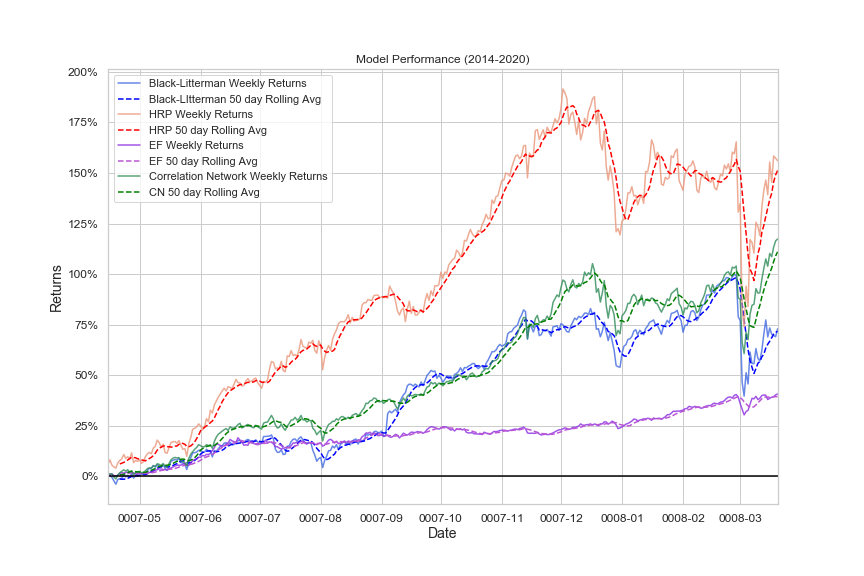

In [57]:
# imports matplotlib submodule to aesthetically place date ticks
from matplotlib.dates import AutoDateFormatter, AutoDateLocator

# returns Hedgecraft 50 day moving avg
bl_rolling_50d_avg = (bl_weekly_roi.rename('Black-LItterman 50 day Rolling Avg')
                        .rolling(7)
                        .mean()
)

# returns HRP 50 day moving avg
hrp_rolling_50d_avg = (hrp_weekly_roi.rename('HRP 50 day Rolling Avg')
                        .rolling(7)
                        .mean()
)

# returns Efficient Frontier 50 day moving avg
ef_rolling_50d_avg = (ef_weekly_roi.rename('EF 50 day Rolling Avg')
                            .rolling(7)
                            .mean()
)

# returns Correlation 50 day moving avg
cn_rolling_50d_avg = (cn_weekly_roi.rename('CN 50 day Rolling Avg')
                            .rolling(7)
                            .mean()
)


with sns.axes_style('whitegrid'):
    # initializes figure and axis
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)

    # gets xtick postions for datetime objects, set minimum number of xticks to 3
    xtick_locator = AutoDateLocator(minticks=3)

    # aesthetically formats xticks
    xtick_formatter = AutoDateFormatter(xtick_locator)


    # returns pretty seaborn plot of Black-Litterman returns and its 50 day rolling avg
    bl_weekly_roi.plot(color='royalblue', alpha=0.8)
    bl_rolling_50d_avg.plot(color='blue', ls='dashed')

    # returns pretty seaborn plot of HRP returns and its 50 day rolling avg
    hrp_weekly_roi.plot(color='darksalmon', alpha=0.8)
    hrp_rolling_50d_avg.plot(color='red', ls='dashed')
    
    # returns pretty seaborn plot of EF returns and its 50 day rolling avg
    ef_weekly_roi.plot(color='blueviolet', alpha=0.8)
    ef_rolling_50d_avg.plot(color='mediumorchid', ls='dashed')

    # returns pretty seaborn plot of Correlation Network returns and its 50 day rolling avg
    cn_weekly_roi.plot(color='seagreen', alpha=0.8)
    cn_rolling_50d_avg.plot(color='green', ls='dashed')

    # renders xticks, sets ylabel, and turns legend on
    ax.xaxis.set_major_locator(xtick_locator)
    ax.xaxis.set_major_formatter(xtick_formatter)
    ax.set_title('Model Performance (2014-2020)')
    ax.set_ylabel('Returns')
    ax.legend()

    # gets ytick labels and converts to pct format
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:.0f}%'.format(x) for x in vals])

    # draws a horizontal line at 0, turns grid on
    plt.axhline(0, color='black');
    plt.tick_params(left=False, bottom=False)



In [58]:
returns_summary

,Black-Litterman Returns,HRP Returns,Efficient Frontier Returns,Correlation Network Returns,Dow Return Rates,S&P500 Return Rates,Black-Litterman Return Rates,HRP Return Rates,Efficient Frontier Return Rates,Correlation Network Return Rates
2014,12.6%,27.0%,10.8%,15.3%,7.52%,11.39%,12.6%,27.0%,10.8%,15.3%
2015,16.7%,65.8%,16.6%,27.6%,-2.23%,-0.73%,4.1%,38.8%,5.8%,12.3%
2016,45.6%,79.8%,21.6%,40.5%,13.42%,9.54%,28.9%,14.0%,5.0%,12.9%
2017,74.9%,158.9%,23.1%,70.8%,25.08%,19.42%,29.3%,79.1%,1.5%,30.3%
2018,54.0%,119.4%,24.0%,70.5%,-5.63%,-6.24%,-20.9%,-39.5%,0.9%,-0.3%
2019,96.7%,148.6%,36.9%,96.7%,22.34%,28.88%,42.7%,29.2%,12.9%,26.2%
2020,73.0%,156.1%,40.8%,117.4%,-7.39%,1.25%,-23.7%,7.5%,3.9%,20.7%


# Visualizing Drawdowns

<IPython.core.display.Javascript object>


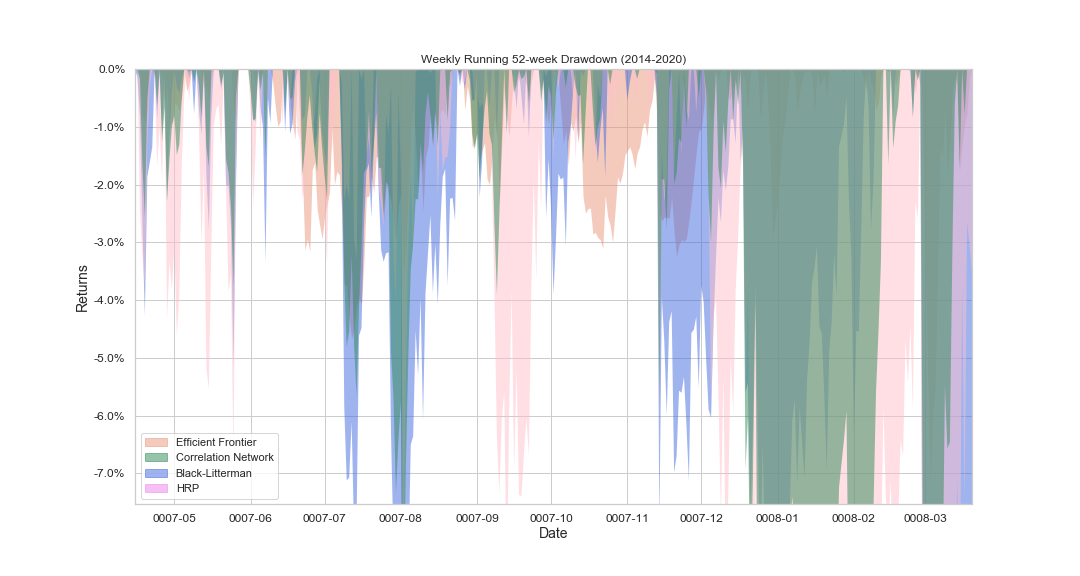

In [59]:
# imports tool to build legends
import matplotlib.patches as mpatches

with sns.axes_style('whitegrid'):
    # initializes figure and axis
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(111)

    # gets xtick postions for datetime objects, set minimum number of xticks to 3
    xtick_locator = AutoDateLocator(minticks=8)

    # aesthetically formats xticks
    xtick_formatter = AutoDateFormatter(xtick_locator)

    ef_daily_drawdown.plot.area(ax=ax, linewidth=0, alpha=0.5, color='darksalmon')
    #ef_max_daily_drawdown.plot(color='darksalmon')

    bl_daily_drawdown.plot.area(ax=ax, linewidth=0, alpha=0.5, color='royalblue')
    #bl_max_daily_drawdown.plot(color='royalblue')
    
    hrp_daily_drawdown.plot.area(ax=ax, linewidth=0, alpha=0.5, color='pink')
    #hrp_max_daily_drawdown.plot(color='violet')

    cn_daily_drawdown.plot.area(ax=ax, linewidth=0, alpha=0.5, color='seagreen')
    #cn_max_daily_drawdown.plot(color='seagreen')

    # renders xticks, sets ylabel, and turns legend on
    ax.xaxis.set_major_locator(xtick_locator)
    ax.xaxis.set_major_formatter(xtick_formatter)
    
    ax.set_ylabel('Returns')
    
    # sets legend patches color and labels
    hrp_patch = mpatches.Patch(color='violet', label='HRP', alpha=0.5)
    ef_patch = mpatches.Patch(color='darksalmon', label='Efficient Frontier', alpha=0.5)
    bl_patch = mpatches.Patch(color='royalblue', label='Black-Litterman', alpha=0.5)
    cn_patch = mpatches.Patch(color='seagreen', label='Correlation Network', alpha=0.5)
    
    # turns legend on with patches
    plt.legend(handles=[ef_patch, cn_patch, bl_patch, hrp_patch])

    plt.tick_params(left=False, bottom=False)
    plt.title('Weekly Running 52-week Drawdown (2014-2020)')

     # gets ytick labels and converts to pct format
    vals = ax.get_yticks()
    ax.set_yticklabels([str(round(x*100,2)) + '%' for x in vals])

In [60]:
backtest_stats

,Black-Litterman,HRP,Efficient Frontier,Correlation Network
Avg Annual Rate of Returns,7.72%,17.13%,5.75%,16.39%
Annual Volatility,14.87%,18.52%,4.15%,9.82%
Maximum Drawdown,-30.12%,-34.7%,-7.17%,-21.24%
Annualized Sharpe Ratio,0.45,0.87,1.14,1.57
Returns Over Maximum Drawdown,2.42,4.5,5.69,5.53
Growth-Risk Ratio,0.78,1.44,1.87,1.96


## Analyzing the Distribution of Returns

In [61]:
# probability of Black-Litterman losing money
bl_prob_lose_money = (bl_weekly_roi[bl_weekly_roi < 0].shape[0] 
                       / bl_weekly_roi.shape[0])

# probability of HRP losing money
hrp_prob_lose_money = (hrp_weekly_roi[hrp_weekly_roi < 0].shape[0] 
                          / hrp_weekly_roi.shape[0])
                      
# probability of EF losing money
ef_prob_lose_money = (ef_weekly_roi[ef_weekly_roi < 0].shape[0] 
                          / ef_weekly_roi.shape[0])

# probability of CN losing money
cn_prob_lose_money = (cn_weekly_roi[cn_weekly_roi < 0].shape[0] 
                          / cn_weekly_roi.shape[0])
                       
# Black-Litterman rolling monthly avg, suppose each month is 4 weeks
bl_rolling_30d_avg = (bl_weekly_roi.rename('Black-Litterman Monthly Rolling Avg')
                   .rolling(4)
                   .mean()
)
# HRP rolling monthly day avg, suppose each month is 4 weeks
hrp_rolling_30d_avg = (hrp_weekly_roi.rename('HRP Monthly Rolling Avg')
                      .rolling(4)
                      .mean()
)
                       
# EF rolling monthly day avg, suppose each month is 4 weeks
ef_rolling_30d_avg = (ef_weekly_roi.rename('EF Monthly Rolling Avg')
                      .rolling(4)
                      .mean()
)

# CN rolling monthly day avg, suppose each month is 4 weeks
cn_rolling_30d_avg = (cn_weekly_roi.rename('CN Monthly Rolling Avg')
                      .rolling(4)
                      .mean()
)

# Black-Litterman rolling 90 day avg, suppose it's 13 weeks
bl_rolling_90d_avg = (bl_weekly_roi.rename('Black-Litterman 90 day Rolling Avg')
                   .rolling(13)
                   .mean()
)

# HRP rolling 90 day avg, suppose it's 13 weeks
hrp_rolling_90d_avg = (hrp_weekly_roi.rename('HRP 90 day Rolling Avg')
                   .rolling(13)
                   .mean()
)

# EF rolling 90 day avg, suppose it's 13 weeks
ef_rolling_90d_avg = (ef_weekly_roi.rename('EF 90 day Rolling Avg')
                   .rolling(13)
                   .mean()
)
                       
# CN rolling 90 day avg, suppose it's 13 weeks
cn_rolling_90d_avg = (cn_weekly_roi.rename('CN 90 day Rolling Avg')
                   .rolling(13)
                   .mean()
)
                       
# Model list of rolling avgs
bl_rolling_avg_list = [bl_rolling_30d_avg, bl_rolling_50d_avg, bl_rolling_90d_avg]
hrp_rolling_avg_list = [hrp_rolling_30d_avg, hrp_rolling_50d_avg, hrp_rolling_90d_avg]
ef_rolling_avg_list = [ef_rolling_30d_avg, ef_rolling_50d_avg, ef_rolling_90d_avg]
cn_rolling_avg_list = [cn_rolling_30d_avg, cn_rolling_50d_avg, cn_rolling_90d_avg]
                       
# Black-Litterman probabilities of falling below 30, 50, and 90 day rolling averages
bl_prob_below_rolling_avgs = []
for i in bl_rolling_avg_list:
    (bl_prob_below_rolling_avgs.append(bl_weekly_roi[bl_weekly_roi < i].shape[0] 
                                    / bl_weekly_roi.shape[0]))

# HRP probabilities of falling below 30, 50, and 90 day rolling averages
hrp_prob_below_rolling_avgs = []
for i in hrp_rolling_avg_list:
    (hrp_prob_below_rolling_avgs.append(hrp_weekly_roi[hrp_weekly_roi < i].shape[0] 
                                    / hrp_weekly_roi.shape[0]))

# EF probabilities of falling below 30, 50, and 90 day rolling averages
ef_prob_below_rolling_avgs = []
for i in ef_rolling_avg_list:
    (ef_prob_below_rolling_avgs.append(ef_weekly_roi[ef_weekly_roi < i].shape[0] 
                                    / ef_weekly_roi.shape[0]))

# CN probabilities of falling below 30, 50, and 90 day rolling averages
cn_prob_below_rolling_avgs = []
for i in cn_rolling_avg_list:
    (cn_prob_below_rolling_avgs.append(cn_weekly_roi[cn_weekly_roi < i].shape[0] 
                                    / cn_weekly_roi.shape[0]))
# worst day each model
bl_max_loss = min(bl_weekly_roi)
hrp_max_loss = min(hrp_weekly_roi)
ef_max_loss = min(ef_weekly_roi)                       
cn_max_loss = min(cn_weekly_roi)    

# avg amount of money lost by each model when returns fell below 0%
bl_mean_loss = bl_weekly_roi[bl_weekly_roi < 0].mean()
hrp_mean_loss = hrp_weekly_roi[hrp_weekly_roi < 0].mean()
ef_mean_loss = ef_weekly_roi[ef_weekly_roi < 0].mean()                       
cn_mean_loss = cn_weekly_roi[cn_weekly_roi < 0].mean()                       

# BL distribution of returns statistics
bl_dist_stats = [
                    bl_prob_lose_money*100, 
                    bl_max_loss, 
                    bl_mean_loss, 
                    bl_prob_below_rolling_avgs[0]*100,
                    bl_prob_below_rolling_avgs[1]*100, 
                    bl_prob_below_rolling_avgs[2]*100
]

# rounds above list and annotates with % sign
bl_dist_stats = [str(round(x, 2)) + '%' for x in bl_dist_stats]

# hrp distribution of returns statistics
hrp_dist_stats = [
                    hrp_prob_lose_money*100, 
                    hrp_max_loss, 
                    hrp_mean_loss, 
                    hrp_prob_below_rolling_avgs[0]*100,
                    hrp_prob_below_rolling_avgs[1]*100, 
                    hrp_prob_below_rolling_avgs[2]*100
]

# rounds above list and annotates with % sign
hrp_dist_stats = [str(round(x, 2)) + '%' for x in hrp_dist_stats]
                       
# Ef distribution of returns statistics
ef_dist_stats = [
                    ef_prob_lose_money*100, 
                    ef_max_loss, 
                    ef_mean_loss, 
                    ef_prob_below_rolling_avgs[0]*100,
                    ef_prob_below_rolling_avgs[1]*100, 
                    ef_prob_below_rolling_avgs[2]*100
]

# rounds above list and annotates with % sign
ef_dist_stats = [str(round(x, 2)) + '%' for x in ef_dist_stats]

# CN distribution of returns statistics
cn_dist_stats = [
                    cn_prob_lose_money*100, 
                    cn_max_loss, 
                    cn_mean_loss, 
                    cn_prob_below_rolling_avgs[0]*100,
                    cn_prob_below_rolling_avgs[1]*100, 
                    cn_prob_below_rolling_avgs[2]*100
]

# rounds above list and annotates with % sign
cn_dist_stats = [str(round(x, 2)) + '%' for x in cn_dist_stats]

# dictionary of distribution stats
dist_stats_summary = {
                        'Black-Litterman': bl_dist_stats, 
                        'HRP': hrp_dist_stats, 
                        'Efficient Frontier': ef_dist_stats,
                        'Correlation Network': cn_dist_stats
}

# converts above dict to a DataFrame
dist_stats_summary = pd.DataFrame.from_dict(dist_stats_summary)

# renames the indices
dist_stats_summary = dist_stats_summary.rename(index={
                                 0:'probability of losing money from initial investement', 
                                 1:'maximum loss',
                                 2:'mean loss',
                                 3:'Probability of falling bellow 30 day rolling avg',
                                 4:'Probability of falling bellow 50 day rolling avg',
                                 5:'Probability of falling bellow 90 day rolling avg'
                            }
);

## Visualizing the Distribution of Returns

<IPython.core.display.Javascript object>


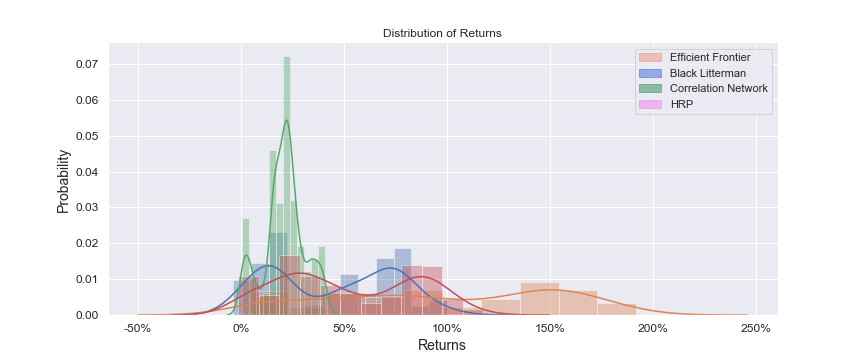

In [62]:
# function to plot many overlaping kde plots
def multi_distplot(rdist1, rdist2, rdist3,rdist4, kde=True):
    
    # initializes figure and axis
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(111)

    # pretty seaborn kde plots for each model
    sns.distplot(rdist1, bins=12, kde=bool)
    sns.distplot(rdist2, bins=10, kde=bool)
    sns.distplot(rdist3, bins=12, kde=bool)
    sns.distplot(rdist4, bins=12, kde=bool)
    
    # gets xticks
    vals1 = ax.get_xticks()
    
    # reformats xticks to pcts
    ax.set_xticklabels(['{:.0f}%'.format(x) for x in vals1])
    
    # plot labels and title
    ax.set_ylabel('Probability')
    ax.set_xlabel('Returns')
    plt.title('Distribution of Returns')
    
    # removes spines
    sns.despine(top=True, right=True)

    # sets legend patches color and labels
    ef_patch = mpatches.Patch(color='darksalmon', label='Efficient Frontier', alpha=0.5)
    bl_patch = mpatches.Patch(color='royalblue', label='Black Litterman', alpha=0.5)
    cn_patch = mpatches.Patch(color='seagreen', label='Correlation Network', alpha=0.5)
    hrp_patch = mpatches.Patch(color='violet', label='HRP', alpha=0.5)
    
    # turns legend on with patches
    plt.legend(handles=[ef_patch, bl_patch, cn_patch, hrp_patch])
    
multi_distplot(rdist1 = bl_weekly_roi, rdist2 = hrp_weekly_roi, rdist3 = ef_weekly_roi, rdist4=cn_weekly_roi)

In [63]:
dist_stats_summary

,Black-Litterman,HRP,Efficient Frontier,Correlation Network
probability of losing money from initial investement,2.64%,0.0%,0.0%,0.59%
maximum loss,-3.88%,4.09%,0.29%,-1.27%
mean loss,-1.31%,nan%,nan%,-0.79%
Probability of falling bellow 30 day rolling avg,34.31%,35.19%,36.36%,30.5%
Probability of falling bellow 50 day rolling avg,30.21%,30.21%,31.38%,27.86%
Probability of falling bellow 90 day rolling avg,25.22%,24.93%,24.63%,22.58%
